<a href="https://colab.research.google.com/github/ROSY18/POSTWORK2/blob/master/AlimentacionvsCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALIMENTACIÓN vS COVID**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



#### **HIPOTÉSIS**

# Se pretende identificar la relación que existe entre el número de contagios, muertes y recuperados por **Covid-19** y el tipo de alimentacion de la población a nivel mundial: **¿Es posible qué el tipo de alimentación influya en la propagación del virus y sus efectos?**


 Se toma de Kaggle el Dataset COVID-19 Healthy Diet ( https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset) 

### EXPLORACIÓN Y LIMPIEZA DE DATOS

Se trabaja con el archivo Food_ Quantity_Supply_Kg.csv, se verifica el contenido y comienza la limpieza y depuración (cambio de nombres de columnas e integrar un nuevo DataFrame con las variables a analizar)

In [ ]:
df_diet2 = pd.read_csv('Foodkg_Supply.csv')

In [ ]:
df_diet2.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,diabetes,hypertension,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,1090800,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,237600,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,1904700,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,532400,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,9300,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,%


In [ ]:
mapping_nombres_columnas = {
    'Country': 'country',
    'Alcoholic Beverages': 'alcoh_bever_kg',
    'Animal Products': 'animal_prod_kg',
    'Animal fats': 'anim_fat_kg',
    'Aquatic Products, Other': 'aqua_prod_kg',
    'Cereals - Excluding Beer': 'cereal_kg',
    'Eggs': 'eggs_kg',
    'Fish, Seafood': 'seafood_kg',
    'Fruits - Excluding Wine': 'fruits_kg',
    'Meat': 'meat_kg',
    'Miscellaneous': 'miscel_kg',
    'Milk - Excluding Butter': 'milk_kg',
    'Offals': 'offals_kg',
    'Oilcrops': 'oilcrops_kg',
    'Pulses': 'pulses_kg',
    'Spices': 'spices_kg',
    'Starchy Roots': 'star_roots_kg',
    'Stimulants': 'stim_kg',
    'Sugar Crops': 'sug_crops_kg',
    'Sugar & Sweeteners': 'swet_kg',
    'Treenuts': 'treenuts_kg',
    'Vegetal Products': 'veg_prod_kg',
    'Vegetable Oils':'veg_oi_kg',
    'Vegetables':'vegetables_kg',
    'Obesity': 'obesity',
    'Undernourished':'undernorished', 
    'Confirmed':'confirmed', 
    'Deaths':'deaths', 
    'Recovered':'recovered',
    'Active':'active',
    'Population':'population',
    'Unit (all except Population)':'unit'

    
    
}

In [ ]:
df_diet2 = df_diet2.rename(columns=mapping_nombres_columnas)

In [ ]:
df_diet2.head()

,country,alcoh_bever_kg,anim_fat_kg,animal_prod_kg,aqua_prod_kg,cereal_kg,eggs_kg,seafood_kg,fruits_kg,meat_kg,milk_kg,miscel_kg,offals_kg,oilcrops_kg,pulses_kg,spices_kg,star_roots_kg,stim_kg,swet_kg,sug_crops_kg,treenuts_kg,veg_oi_kg,vegetables_kg,veg_prod_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,unit
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,1090800,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,237600,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,1904700,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,532400,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,9300,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,%


In [ ]:
df_diet2.to_csv('dieta_limpia.csv')

In [ ]:
df_income = pd.read_csv('level_income.csv')

In [ ]:
df_income_2 = df_income.drop(columns=['country'])

In [ ]:
df_nueva = pd.concat([df_diet2, df_income_2], axis=1)

In [ ]:
df_nueva.head()

,country,alcoh_bever_kg,anim_fat_kg,animal_prod_kg,aqua_prod_kg,cereal_kg,eggs_kg,seafood_kg,fruits_kg,meat_kg,milk_kg,miscel_kg,offals_kg,oilcrops_kg,pulses_kg,spices_kg,star_roots_kg,stim_kg,swet_kg,sug_crops_kg,treenuts_kg,veg_oi_kg,vegetables_kg,veg_prod_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,unit,income_level
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,1090800,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,%,Low-Income
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,237600,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,%,Upper- Middle- Income
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,1904700,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,%,Lower-Middle-Income
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,532400,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,%,Lower-Middle-Income
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,9300,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,%,High-Income


In [ ]:
df_dieta_nueva = df_nueva[['country', 'alcoh_bever_kg', 'meat_kg', 'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg', 'obesity', 'undernorished', 'diabetes', 'hypertension', 'confirmed', 'deaths', 'recovered', 'active', 'population','income_level']].set_index('country')

In [ ]:
df_dieta_nueva.to_csv('dieta_modificada.csv')

### Se comienza a trabajar sobre el archivo 'dieta_modificada.csv'





In [ ]:
df_dieta= pd.read_csv('dieta_modificada.csv')



LEER CSV Y PONER PAIS COMO INDICE 

In [ ]:
df_dieta.head().set_index('country')

,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,1090800,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,Low-Income
Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,237600,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,Upper- Middle- Income
Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,1904700,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,Lower-Middle-Income
Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25,532400,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,Lower-Middle-Income
Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,NaN,9300,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,High-Income


In [ ]:
df_dieta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         170 non-null    object 
 1   alcoh_bever_kg  170 non-null    float64
 2   meat_kg         170 non-null    float64
 3   animal_prod_kg  170 non-null    float64
 4   anim_fat_kg     170 non-null    float64
 5   cereal_kg       170 non-null    float64
 6   eggs_kg         170 non-null    float64
 7   fruits_kg       170 non-null    float64
 8   seafood_kg      170 non-null    float64
 9   milk_kg         170 non-null    float64
 10  spices_kg       170 non-null    float64
 11  pulses_kg       170 non-null    float64
 12  star_roots_kg   170 non-null    float64
 13  veg_prod_kg     170 non-null    float64
 14  swet_kg         170 non-null    float64
 15  treenuts_kg     170 non-null    float64
 16  obesity         167 non-null    float64
 17  undernorished   163 non-null    obj

In [ ]:
df_dieta.isna().sum()

country            0
alcoh_bever_kg     0
meat_kg            0
animal_prod_kg     0
anim_fat_kg        0
cereal_kg          0
eggs_kg            0
fruits_kg          0
seafood_kg         0
milk_kg            0
spices_kg          0
pulses_kg          0
star_roots_kg      0
veg_prod_kg        0
swet_kg            0
treenuts_kg        0
obesity            3
undernorished      7
diabetes           0
hypertension       1
confirmed          8
deaths            18
recovered          9
active            10
population         0
income_level       0
dtype: int64

Llenar todos los valores nulos con cero

In [ ]:
df_dieta.fillna(0.0)

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,income_level
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,1090800,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,Low-Income
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,237600,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,Upper- Middle- Income
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,1904700,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,Lower-Middle-Income
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25,532400,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,Lower-Middle-Income
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0,9300,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,3.8328,14.7565,0.0403,12.9253,0.3389,7.6460,0.9456,9.3920,0.0009,0.3342,2.5643,35.2416,3.4106,0.0009,25.2,21.2,1403600,5.328834e+06,83137.0,697.0,74664.0,0.032358,28645000.0,Upper- Middle- Income
166,Vietnam,1.4591,4.4382,8.5765,0.1640,16.8740,0.3077,5.9029,2.6392,0.6069,0.2074,0.2032,1.0596,41.4232,1.2846,0.3070,2.1,9.3,3779600,2.243495e+07,1110.0,35.0,1025.0,0.000438,96209000.0,Lower-Middle-Income
167,Yemen,0.0364,2.7871,5.7874,0.0446,27.2077,0.2579,5.1344,0.5240,1.8911,0.0347,0.8645,1.0794,44.2126,5.0468,0.0017,14.1,38.9,572700,9.112695e+06,2052.0,596.0,1329.0,0.000912,29826000.0,Low-Income
168,Zambia,5.7360,1.8427,6.0197,0.0829,21.1938,0.3399,1.0183,1.6924,1.7570,0.0478,0.1756,7.9649,43.9789,1.5632,0.0014,6.5,46.7,273800,4.973701e+06,15549.0,345.0,14682.0,0.004678,18384000.0,Lower-Middle-Income


In [ ]:
df_dieta.replace({'<2.5': 2.0}, inplace=True)

CONVERTIR LOS VALORES DE LAS VARIABLES A FLOAT, STR U OBJJECT 

In [ ]:
diccionario_de_conversion = {
    'country': str,
    'animal_prod_kg': float,
    'cereal_kg': float,
    'fruits_kg': float,
    'milk_kg': float,
    'veg_prod_kg': float,
    'obesity': float,
    'undernorished': float,
    'diabetes': float,
    'hypertension': float,
    'confirmed': float,
    'deaths': float,
    'recovered': float,
    'active': float,
    'population': float,
    'income_level': str	
}

In [ ]:
df_dieta = df_dieta.astype(diccionario_de_conversion)

In [ ]:
df_dieta = df_dieta.fillna(0.0)

In [ ]:
df_dieta.head(10)

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,income_level
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,1090800.0,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,Low-Income
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,237600.0,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,Upper- Middle- Income
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,1904700.0,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,Lower-Middle-Income
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25.0,532400.0,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,Lower-Middle-Income
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0.0,9300.0,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,High-Income
5,Argentina,4.2672,7.0421,19.3454,0.2234,8.4102,0.9979,6.0435,0.4693,10.2328,0.0122,0.0528,3.0420,30.6559,3.0536,0.0200,28.5,4.6,1837400.0,1.026123e+07,903730.0,24186.0,732582.0,0.184607,45377000.0,Upper- Middle- Income
6,Armenia,0.4014,2.2675,13.5640,0.1833,7.2982,0.5783,6.0989,0.2896,9.9407,0.0055,0.1441,2.0359,36.4358,2.6579,0.1108,20.9,4.3,141200.0,7.492217e+05,56821.0,1026.0,45891.0,0.201252,2956000.0,Upper- Middle- Income
7,Australia,5.5436,6.7049,21.4175,0.3143,5.4979,0.4428,4.1883,1.4264,12.1018,0.0458,0.0546,2.7884,28.5806,2.5364,0.3176,30.4,2.0,1288300.0,3.906916e+06,27287.0,898.0,25013.0,0.020063,25754000.0,High-Income
8,Austria,7.0215,4.6810,19.5654,0.8555,6.2116,0.7884,4.6069,0.7562,12.3776,0.0494,0.0456,3.0548,30.4338,2.6094,0.2367,21.9,2.0,641500.0,1.870597e+06,56298.0,855.0,44065.0,0.033240,8914000.0,High-Income
9,Azerbaijan,3.5969,2.1513,11.6416,0.2544,13.0898,0.5593,4.7988,0.2020,8.3212,0.0044,0.0347,4.7041,38.3584,1.5523,0.1906,19.9,2.0,421600.0,2.468089e+06,42104.0,609.0,39404.0,0.017442,10108000.0,Upper- Middle- Income


ELIMINAR LOS PORCENTAJES DE LAS COLUMNA DE OBESIDAD, DESNUTRICIÓN, CONFIRMADOS, MUERTES Y RECUPERADOS POR POBLACION TOTAL

In [ ]:
dieta_2 = df_dieta.assign(obesity_num = lambda x: x.obesity * x.population, undernorished_num = lambda x: x.undernorished * x.population, confirmed_num = lambda x: x.confirmed * x.population, deaths_num = lambda x: x.deaths * x.population, recov_num = lambda x: x.recovered * x.population)   

In [ ]:
dieta_2 = df_dieta.assign(obesity_num = lambda x: x.obesity * x.population, undernorished_num = lambda x: x.undernorished * x.population)

In [ ]:
dieta_2.head()

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,income_level,obesity_num,undernorished_num
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,1090800.0,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,Low-Income,1.751760e+08,1.160054e+09
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,237600.0,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,Upper- Middle- Income,6.328740e+07,1.759560e+07
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,1904700.0,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,Lower-Middle-Income,1.179896e+09,1.729923e+08
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25.0,532400.0,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,Lower-Middle-Income,2.211496e+08,8.130500e+08
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0.0,9300.0,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,High-Income,1.871800e+06,0.000000e+00


SE ELIMINAN LOS PORCENTAJES DE TIPO DE ALIMENTO MULTIPLICANDO TODAS LAS COLUMNAS POR 1000

In [ ]:
dieta_3 = dieta_2.assign(alcoh_kg = lambda x: x.alcoh_bever_kg * 1000, meat_kg1 = lambda x: x.meat_kg * 1000, animal_prod_kg1 = lambda x: x.animal_prod_kg * 1000, anim_fat_kg1 = lambda x: x.anim_fat_kg * 1000, cereal_kg1 = lambda x: x.cereal_kg * 1000, eggs_kg1 = lambda x: x.eggs_kg * 1000, fruits_kg1 = lambda x: x.fruits_kg * 1000, seafood_kg1 = lambda x: x.seafood_kg * 1000, milk_kg1 = lambda x: x.milk_kg * 1000, spices_kg1 = lambda x: x.spices_kg * 1000, pulses_kg1 = lambda x: x.pulses_kg * 1000, roots_kg1 = lambda x: x.star_roots_kg * 1000, veg_kg1 = lambda x: x.veg_prod_kg * 1000, swet_kg1 = lambda x: x.swet_kg * 1000, treenuts_kg1 = lambda x: x.treenuts_kg * 1000 )

In [ ]:
dieta_3.head()

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,diabetes,hypertension,confirmed,deaths,recovered,active,population,income_level,obesity_num,undernorished_num,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,1090800.0,1.189716e+07,39870.0,1479.0,33118.0,0.021661,38928000.0,Low-Income,1.751760e+08,1.160054e+09,1.4,1202.0,9434.1,197.3,24809.7,209.9,5349.5,35.0,7582.8,57.4,295.3,880.2,40564.5,1348.9,77.0
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,237600.0,8.233263e+05,15570.0,424.0,9585.0,0.135483,2838000.0,Upper- Middle- Income,6.328740e+07,1.759560e+07,1671.9,1884.5,18768.4,135.7,5781.7,581.5,6786.1,212.6,15721.3,0.8,238.0,1809.6,31230.4,1536.7,151.5
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,1904700.0,1.108917e+07,53225.0,1809.0,37382.0,0.024535,44357000.0,Lower-Middle-Income,1.179896e+09,1.729923e+08,271.1,1130.5,9633.4,28.2,13681.6,527.7,6380.1,241.6,7618.9,55.7,478.3,4134.0,40365.1,1834.2,115.2
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25.0,532400.0,9.622639e+06,6488.0,219.0,2744.0,0.003865,32522000.0,Lower-Middle-Income,2.211496e+08,8.130500e+08,5808.7,2057.1,4927.8,56.0,9108.5,58.7,6000.5,1770.7,831.1,0.9,650.7,18110.2,45072.2,1849.5,6.1
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0.0,9300.0,2.290999e+04,111.0,3.0,97.0,0.002041,98000.0,High-Income,1.871800e+06,0.000000e+00,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3


SE CREA UN NUEVO DATA FRAME "MODIFICADO", QUE INCLUYA LAS VARIABLES 'confirmed_num', 'deaths_num', y recov_num, SE ELIMINAN LOS DUPLICADOS QUE NO TIENEN NUM

In [ ]:
dieta_4 = dieta_3[['country', 'alcoh_kg', 'meat_kg1', 'animal_prod_kg1', 'anim_fat_kg1', 'cereal_kg1', 'eggs_kg1', 'fruits_kg1', 'seafood_kg1', 'milk_kg1', 'spices_kg1', 'pulses_kg1', 'roots_kg1', 'veg_kg1', 'swet_kg1', 'treenuts_kg1', 'obesity_num', 'undernorished_num', 'diabetes', 'hypertension', 'confirmed_num', 'deaths_num', 'recov_num', 'population','income_level']].set_index('country')

In [ ]:
dieta_4 = dieta_3[['country', 'alcoh_kg', 'meat_kg1', 'animal_prod_kg1', 'anim_fat_kg1', 'cereal_kg1', 'eggs_kg1', 'fruits_kg1', 'seafood_kg1', 'milk_kg1', 'spices_kg1', 'pulses_kg1', 'roots_kg1', 'veg_kg1', 'swet_kg1', 'treenuts_kg1', 'obesity_num', 'undernorished_num', 'diabetes', 'hypertension', 'confirmed', 'deaths', 'recovered', 'population','income_level']].set_index('country')

In [ ]:
dieta_4 = dieta_3[['country', 'alcoh_kg', 'meat_kg1', 'animal_prod_kg1', 'anim_fat_kg1', 'cereal_kg1', 'eggs_kg1', 'fruits_kg1', 'seafood_kg1', 'milk_kg1', 'spices_kg1', 'pulses_kg1', 'roots_kg1', 'veg_kg1', 'swet_kg1', 'treenuts_kg1', 'obesity_num', 'undernorished_num', 'diabetes', 'hypertension', 'confirmed', 'deaths', 'recovered', 'population','income_level']].set_index('country')

SE GUARDA EL ARCHIVOEN FORMATO CSV 

In [ ]:
dieta_4.to_csv('diet_modificada_valores.csv')

In [ ]:
dieta_4

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.4,1202.0,9434.1,197.3,24809.7,209.9,5349.5,35.0,7582.8,57.4,295.3,880.2,40564.5,1348.9,77.0,1.751760e+08,1.160054e+09,1090800.0,1.189716e+07,39870.0,1479.0,33118.0,38928000.0,Low-Income
Albania,1671.9,1884.5,18768.4,135.7,5781.7,581.5,6786.1,212.6,15721.3,0.8,238.0,1809.6,31230.4,1536.7,151.5,6.328740e+07,1.759560e+07,237600.0,8.233263e+05,15570.0,424.0,9585.0,2838000.0,Upper- Middle- Income
Algeria,271.1,1130.5,9633.4,28.2,13681.6,527.7,6380.1,241.6,7618.9,55.7,478.3,4134.0,40365.1,1834.2,115.2,1.179896e+09,1.729923e+08,1904700.0,1.108917e+07,53225.0,1809.0,37382.0,44357000.0,Lower-Middle-Income
Angola,5808.7,2057.1,4927.8,56.0,9108.5,58.7,6000.5,1770.7,831.1,0.9,650.7,18110.2,45072.2,1849.5,6.1,2.211496e+08,8.130500e+08,532400.0,9.622639e+06,6488.0,219.0,2744.0,32522000.0,Lower-Middle-Income
Antigua and Barbuda,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3,1.871800e+06,0.000000e+00,9300.0,2.290999e+04,111.0,3.0,97.0,98000.0,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2595.2,3832.8,14756.5,40.3,12925.3,338.9,7646.0,945.6,9392.0,0.9,334.2,2564.3,35241.6,3410.6,0.9,7.218540e+08,6.072740e+08,1403600.0,5.328834e+06,83137.0,697.0,74664.0,28645000.0,Upper- Middle- Income
Vietnam,1459.1,4438.2,8576.5,164.0,16874.0,307.7,5902.9,2639.2,606.9,207.4,203.2,1059.6,41423.2,1284.6,307.0,2.020389e+08,8.947437e+08,3779600.0,2.243495e+07,1110.0,35.0,1025.0,96209000.0,Lower-Middle-Income
Yemen,36.4,2787.1,5787.4,44.6,27207.7,257.9,5134.4,524.0,1891.1,34.7,864.5,1079.4,44212.6,5046.8,1.7,4.205466e+08,1.160231e+09,572700.0,9.112695e+06,2052.0,596.0,1329.0,29826000.0,Low-Income


### ANÁLISIS

SE SACAN LOS MIN Y MAX Y PROMEDIO DE LAS VARIABLES: CONFIRMADOS, MUERTES Y RECUPERADOS 

#### **CONTAGIOS**

###Países con menos contagios 

In [ ]:
dieta_4['confirmed'].min()

0.0

Se identifican los paises que no tienen registro de casos confirmados

In [ ]:
dieta_4[dieta_4['confirmed'] == 0.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Cote d'Ivoire,1448.7,958.6,2914.4,13.2,11458.5,158.7,4874.1,1391.4,128.5,124.7,172.7,23308.0,47080.6,785.9,544.3,235575000.0,4.973250e+08,0.0,7.148284e+06,0.0,0.0,0.0,26175000.0,Lower-Middle-Income
Kiribati,297.0,2385.6,8895.8,48.6,8274.7,164.0,5890.7,6106.5,156.1,6.4,3.2,7183.0,41104.2,4137.3,195.1,5700000.0,3.375000e+05,14000.0,7.723089e+06,0.0,0.0,0.0,125000.0,Lower-Middle-Income
"Korea, North",898.1,1387.2,3393.3,1.0,17937.8,466.8,6138.3,1156.8,314.6,0.0,1100.0,6243.8,46604.6,369.4,42.6,183030900.0,1.232236e+09,3689400.0,0.000000e+00,0.0,0.0,0.0,25779000.0,Low-Income
Saint Vincent and the Grenadines,2526.0,6918.4,11086.5,22.0,9014.2,341.2,10471.0,1378.5,2259.3,211.3,645.2,4373.4,38900.5,3459.2,35.7,2641800.0,6.327000e+05,8800.0,4.278208e+06,0.0,0.0,0.0,111000.0,Upper- Middle- Income
Samoa,1423.6,5799.3,11163.0,226.2,3676.8,131.4,10784.5,2778.8,1964.7,58.2,0.0,7694.4,38834.9,2081.1,10.8,9100000.0,5.400000e+05,7700.0,4.760302e+04,0.0,0.0,0.0,200000.0,Upper- Middle- Income
Turkmenistan,503.8,4376.7,16061.1,337.3,14802.9,513.9,4144.1,213.7,10560.6,1.5,103.2,2300.0,33938.9,674.6,28.3,105542500.0,3.256740e+07,188300.0,1.528365e+06,0.0,0.0,0.0,6031000.0,Upper- Middle- Income
United Arab Emirates,0.0,4940.0,10549.1,189.6,12906.0,595.8,8193.8,1968.2,2646.8,319.4,2110.8,893.7,39446.1,3657.6,583.8,292362200.0,2.542280e+07,1223400.0,1.977153e+06,0.0,0.0,0.0,9778000.0,High-Income
United Republic of Tanzania,4518.5,790.2,4802.2,40.3,10445.3,30.0,6814.7,582.8,3360.6,27.4,2176.1,13937.0,45197.3,1034.5,42.0,424111400.0,1.833834e+09,997400.0,0.000000e+00,0.0,0.0,0.0,59734000.0,Lower-Middle-Income
Vanuatu,242.4,2746.6,6624.4,79.3,6410.2,187.5,5810.3,2164.9,1269.2,37.4,0.8,12727.5,43373.7,1364.5,3.8,7543500.0,2.311200e+06,17000.0,7.746183e+04,0.0,0.0,0.0,321000.0,Lower-Middle-Income


Se guarda el dataframe de los paises que no tienen casos confirmados

In [ ]:
paises_sin_reg1 = dieta_4[dieta_4['confirmed'] == 0.0 ]

In [ ]:
paises_sin_reg1.to_csv('paises_sin_registro1.csv')

Se eliminan las filas de aqellos paises que no tienen casos confirmados, creando un nuevo dataframe

In [ ]:
dieta_4_conf =  dieta_4.drop(["Cote d'Ivoire", 'Kiribati', 'Korea, North', 'Saint Vincent and the Grenadines', 'Samoa', 'Turkmenistan', 'United Arab Emirates', 'United Republic of Tanzania', 'Vanuatu'],axis=0)

In [ ]:
dieta_4_conf['confirmed'].min()

2.0

In [ ]:
dieta_4_conf[dieta_4_conf['confirmed'] == 2.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Solomon Islands,829.8,889.7,3850.4,103.8,9023.3,82.6,3279.8,2284.0,438.0,36.4,736.6,24250.0,46149.2,826.8,35.6,14657500.0,6363500.0,46900.0,157265.1899,2.0,0.0,0.0,715000.0,Lower-Middle-Income


In [ ]:
dieta_4_conf[dieta_4_conf['confirmed'] >= 2.0].sort_values('confirmed',ascending=True).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Solomon Islands,829.8,889.7,3850.4,103.8,9023.3,82.6,3279.8,2284.0,438.0,36.4,736.6,24250.0,46149.2,826.8,35.6,14657500.0,6363500.0,46900.0,1.572652e+05,2.0,0.0,0.0,715000.0,Lower-Middle-Income
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.0,5300.0,2.435390e+07,19.0,0.0,18.0,54000.0,High-Income
Lao People's Democratic Republic,788.3,1711.1,3657.9,97.9,16394.3,106.3,8815.8,1421.3,163.2,131.7,148.5,3483.5,46341.6,1110.1,2.8,32589000.0,119493000.0,191600.0,6.275668e+05,23.0,0.0,22.0,7242000.0,Lower-Middle-Income
Grenada,3131.5,5654.6,12131.9,127.6,7656.9,922.6,11060.8,2580.2,2718.3,317.1,641.7,2222.2,37864.8,5448.0,14.3,2282600.0,0.0,6800.0,3.027326e+04,24.0,0.0,24.0,113000.0,Upper- Middle- Income
New Caledonia,5036.3,5868.7,11781.8,82.1,8584.0,749.4,5585.5,2036.1,2767.5,48.8,127.5,2564.8,38220.8,3190.1,37.6,0.0,2094500.0,46600.0,0.000000e+00,27.0,0.0,27.0,295000.0,High-Income
Saint Lucia,7802.4,8170.0,14889.3,25.2,7209.1,332.6,5945.3,3065.2,2888.1,178.0,566.3,2642.7,35096.4,3704.3,57.5,3603600.0,0.0,14800.0,8.103070e+06,29.0,0.0,27.0,182000.0,Upper- Middle- Income
Timor-Leste,445.9,4037.6,5498.3,89.7,26332.0,102.5,2102.7,1022.5,130.7,50.0,909.8,5502.2,44503.0,2820.3,1.3,3822200.0,32818200.0,32000.0,3.625035e+05,29.0,0.0,28.0,1318000.0,Lower-Middle-Income
Dominica,941.0,2782.0,8901.1,31.9,3401.4,124.4,19302.8,1418.8,4421.7,151.2,225.5,6847.7,41098.9,3173.8,3.5,2030400.0,446400.0,6300.0,6.998929e+06,32.0,0.0,24.0,72000.0,Upper- Middle- Income
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3315200.0,87000.0,5.860854e+07,32.0,2.0,28.0,896000.0,Upper- Middle- Income


In [ ]:
contagios_1 = dieta_4_conf[dieta_4_conf['confirmed'] >= 2.0].sort_values('confirmed',ascending=True).head(20)

In [ ]:
contagios_1a = contagios_1[['confirmed']]



In [ ]:
contagios_1a

,confirmed
country,
Solomon Islands,2.0
Saint Kitts and Nevis,19.0
Lao People's Democratic Republic,23.0
Grenada,24.0
New Caledonia,27.0
Saint Lucia,29.0
Timor-Leste,29.0
Dominica,32.0
Fiji,32.0


In [ ]:
contagios_1.to_csv('menos_confirmados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51b151320>, None)

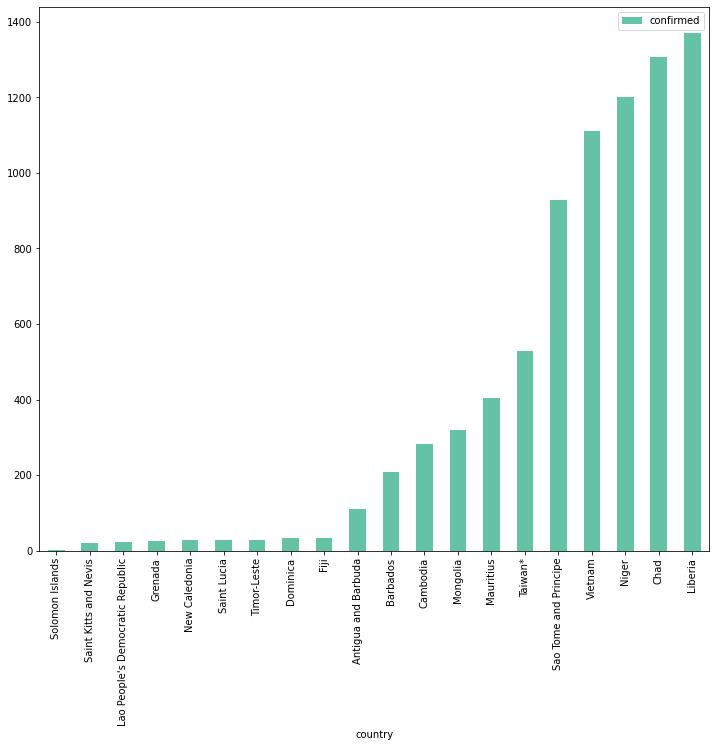

In [ ]:
contagios_1a.plot(kind = 'bar', stacked=False, colormap='Set2', figsize=(12, 10)), plt.savefig('menos_contagios.png')

In [ ]:
dieta_corta = df_dieta[['country', 'alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg',	'obesity', 'undernorished', 'diabetes', 'hypertension']].set_index('country')

In [ ]:
contagios_1b = dieta_corta.reindex(index=["Solomon Islands", "Saint Kitts and Nevis", "Lao People's Democratic Republic", "Grenada", "New Caledonia", "Saint Lucia", "Timor-Leste", "Dominica", "Fiji", "Antigua and Barbuda", "Barbados", "Cambodia", "Mongolia", "Mauritius", "Taiwan*","Sao Tome and Principe","Vietnam", "Niger", "Chad", "Liberia" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

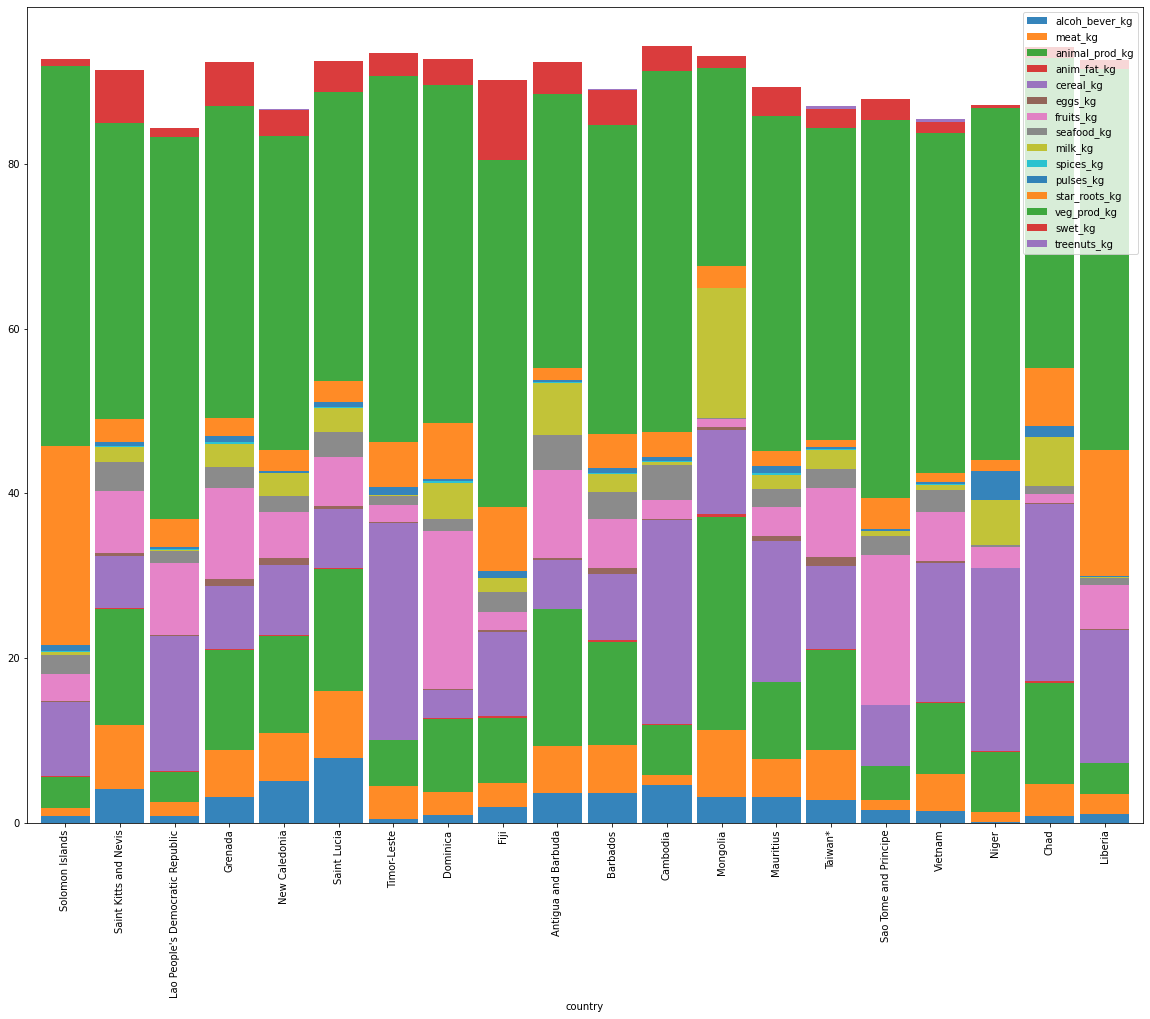

In [ ]:
contagios_1b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_conf1.png'), plt.legend(loc='best');
                 
             

### Países con más contagios

In [ ]:
dieta_4[dieta_4['confirmed'] > 10000].sort_values('confirmed',ascending=False).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,6.597560e+08,30987900.0,4.264195e+07,8037747.0,220011.0,5184564.0,3.298780e+08,High-Income
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,77005600.0,1.622156e+05,7173345.0,109894.0,6224621.0,1.400100e+09,Lower-Middle-Income
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,4.236240e+08,16780800.0,4.940560e+07,5103408.0,150709.0,4495269.0,2.118120e+08,Upper- Middle- Income
Russian Federation,3742.5,4318.0,16152.5,248.6,8280.3,902.9,3162.0,1131.2,9325.3,11.8,142.6,6319.4,33847.2,4614.4,11.8,3.771038e+09,2.934660e+08,8288500.0,8.810724e+04,1312310.0,22722.0,1024235.0,1.467330e+08,Upper- Middle- Income
Colombia,3103.2,3554.0,12821.0,81.4,8105.5,813.2,11327.6,455.2,7744.3,34.3,350.3,5030.9,37177.4,4751.8,94.7,1.092712e+09,2.373312e+08,2836500.0,9.485934e+06,919083.0,27985.0,798396.0,4.944400e+07,Upper- Middle- Income
Spain,5315.2,5345.6,18338.2,235.7,6054.8,732.1,4833.2,2264.6,9599.1,6.9,266.6,3097.5,31658.1,1848.2,428.7,1.290908e+09,9.527000e+07,3619100.0,9.101101e+06,918223.0,33124.0,150000.0,4.763500e+07,High-Income
Argentina,4267.2,7042.1,19345.4,223.4,8410.2,997.9,6043.5,469.3,10232.8,12.2,52.8,3042.0,30655.9,3053.6,20.0,1.293244e+09,2.087342e+08,1837400.0,1.026123e+07,903730.0,24186.0,732582.0,4.537700e+07,Upper- Middle- Income
Peru,3862.3,1754.0,8663.8,31.6,11814.0,643.1,8578.3,1799.3,4072.9,17.2,636.7,8792.4,41334.4,1733.9,23.0,6.269384e+08,3.183928e+08,1385000.0,8.254914e+05,849371.0,33305.0,743969.0,3.282400e+07,Upper- Middle- Income
Mexico,4410.5,4356.1,15152.7,167.2,11432.5,1296.7,7679.4,965.6,7991.7,112.1,707.1,1164.4,34845.6,3226.6,112.1,3.629293e+09,4.600512e+08,12805200.0,3.806125e+06,817503.0,83781.0,594180.0,1.277920e+08,Upper- Middle- Income


In [ ]:
contagios_2 = dieta_4[dieta_4['confirmed'] > 10000].sort_values('confirmed',ascending=False).head(20)

In [ ]:
contagios_2a = contagios_2[['confirmed']]

In [ ]:
contagios_2a

,confirmed
country,
United States of America,8037747.0
India,7173345.0
Brazil,5103408.0
Russian Federation,1312310.0
Colombia,919083.0
Spain,918223.0
Argentina,903730.0
Peru,849371.0
Mexico,817503.0


In [ ]:
contagios_2a.to_csv('mas_confirmados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51b30ecc0>, None)

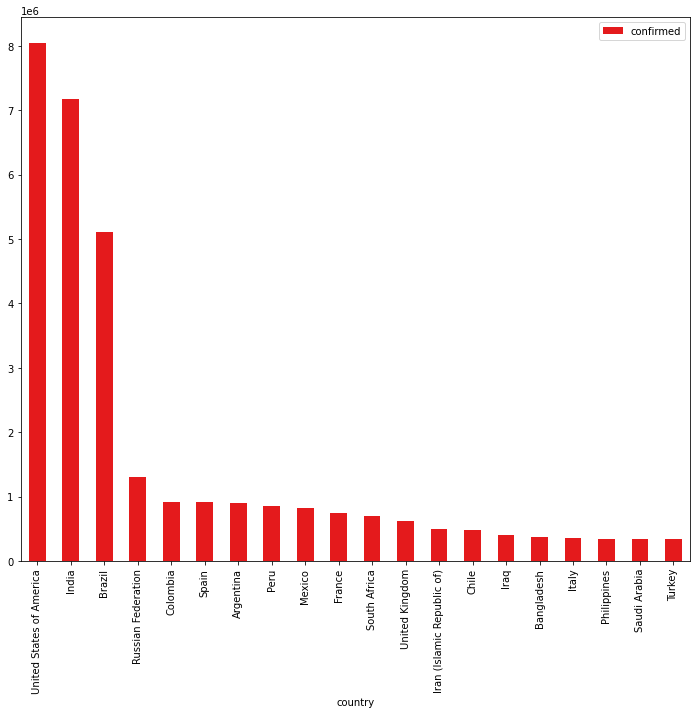

In [ ]:
contagios_2a.plot(kind = 'bar', stacked=False, colormap='Set1', figsize=(12, 10)), plt.savefig('mas_contagios.png')

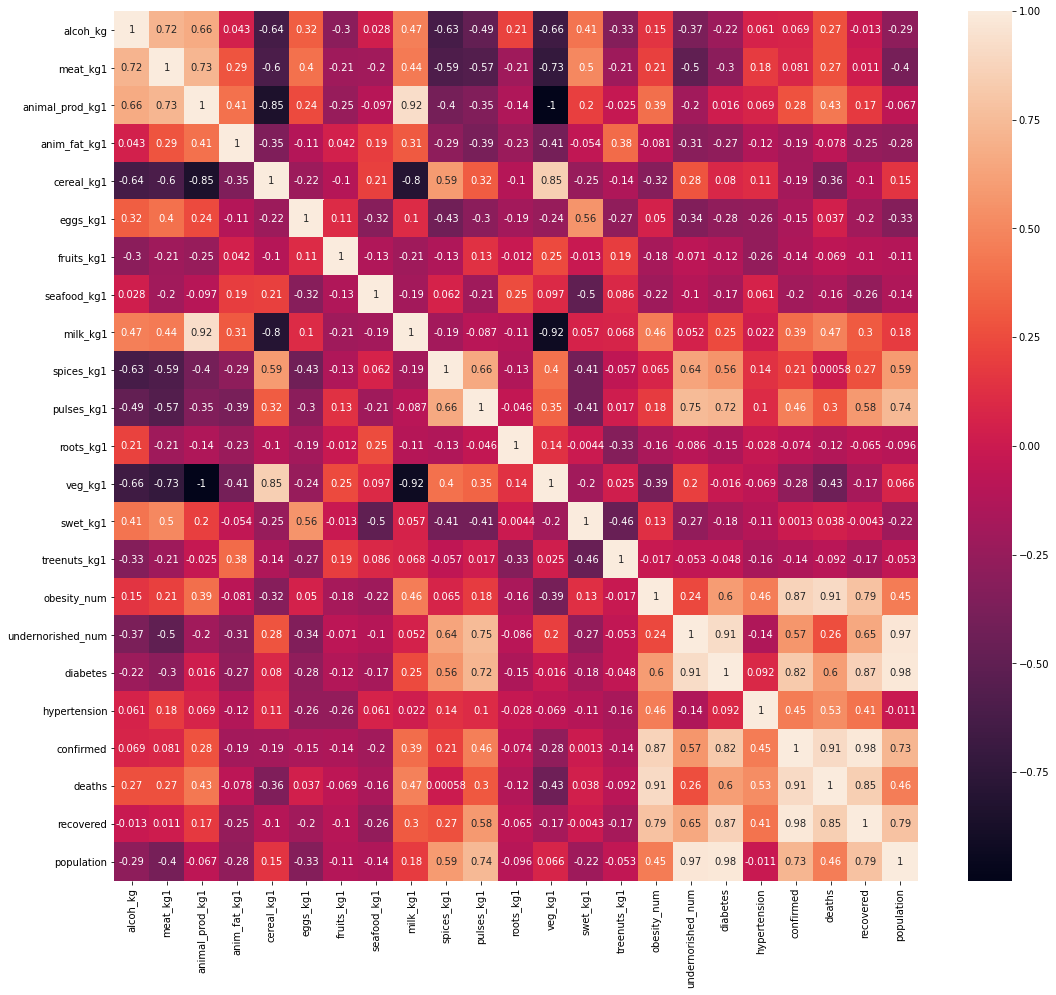

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(contagios_2.corr(), annot=True); plt.savefig('correl_contagios.png')

A tráves del gráfico anterior se puede observar que la variable de mayor correlación con casos confirmados es la obesidad en un 87%, le continuan diabetes con un 82% y desnutrición con 57% e hipertension solo con 47%

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


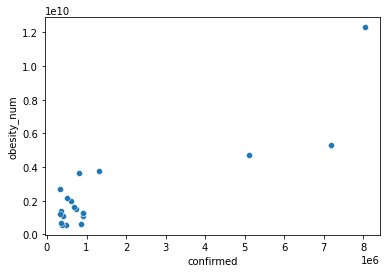

In [ ]:
sns.scatterplot(contagios_2['confirmed'], contagios_2['obesity_num']); plt.savefig('corr_cont_obesity.png')

Se requiere conocer la relacion entre obseidad y la ingesta por tipo de alimento

In [ ]:
contagios_2b = dieta_corta.reindex(index=["United States of America", "Brazil", "India", "Colombia", "Spain", "Argentina", "Peru", "Mexico", "France", "South Africa", "United Kingdom", "Iran (Islamic Republic of)", "Chile", "Iraq", "Bangladesh", "Italy", "Philippines", "Saudi Arabia", "Turkey"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg', 'obesity', 'undernorished', 'diabetes', 'hypertension'])

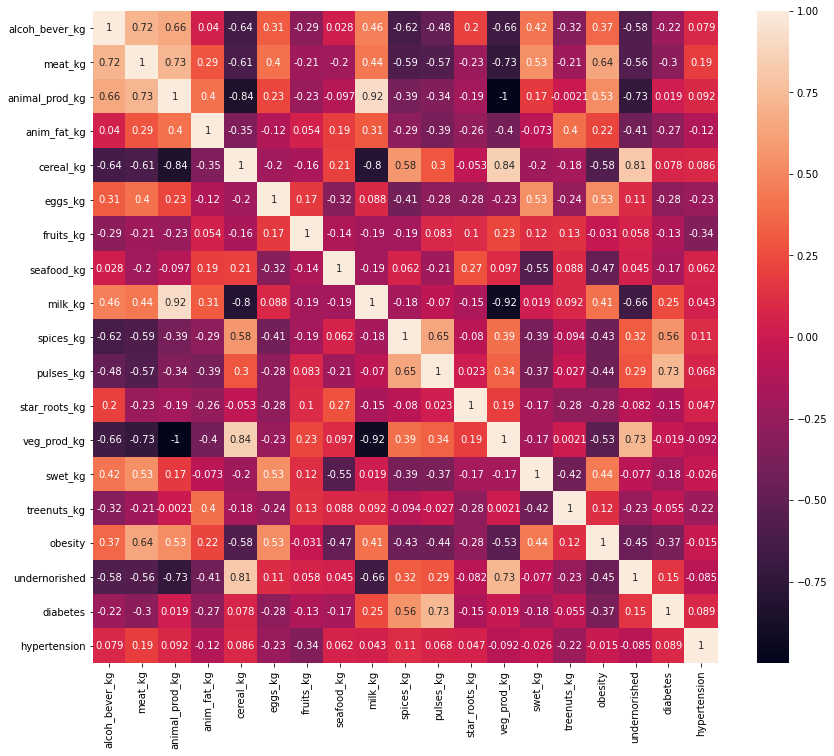

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(contagios_2b.corr(), annot=True);

La obesidad en los países con el mayor número de casos confirmados se encuentra relacionada a una ta ingesta de carne (64% de correlación); y a una baja ingesta de cereales y produtos vegetales (-0.58%  y -0.52%de correlación) 

In [ ]:
contagios_2c = dieta_corta.reindex(index=["United States of America", "Brazil", "India", "Colombia", "Spain", "Argentina", "Peru", "Mexico", "France", "South Africa", "United Kingdom", "Iran (Islamic Republic of)", "Chile", "Iraq", "Bangladesh", "Italy", "Philippines", "Saudi Arabia", "Turkey" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

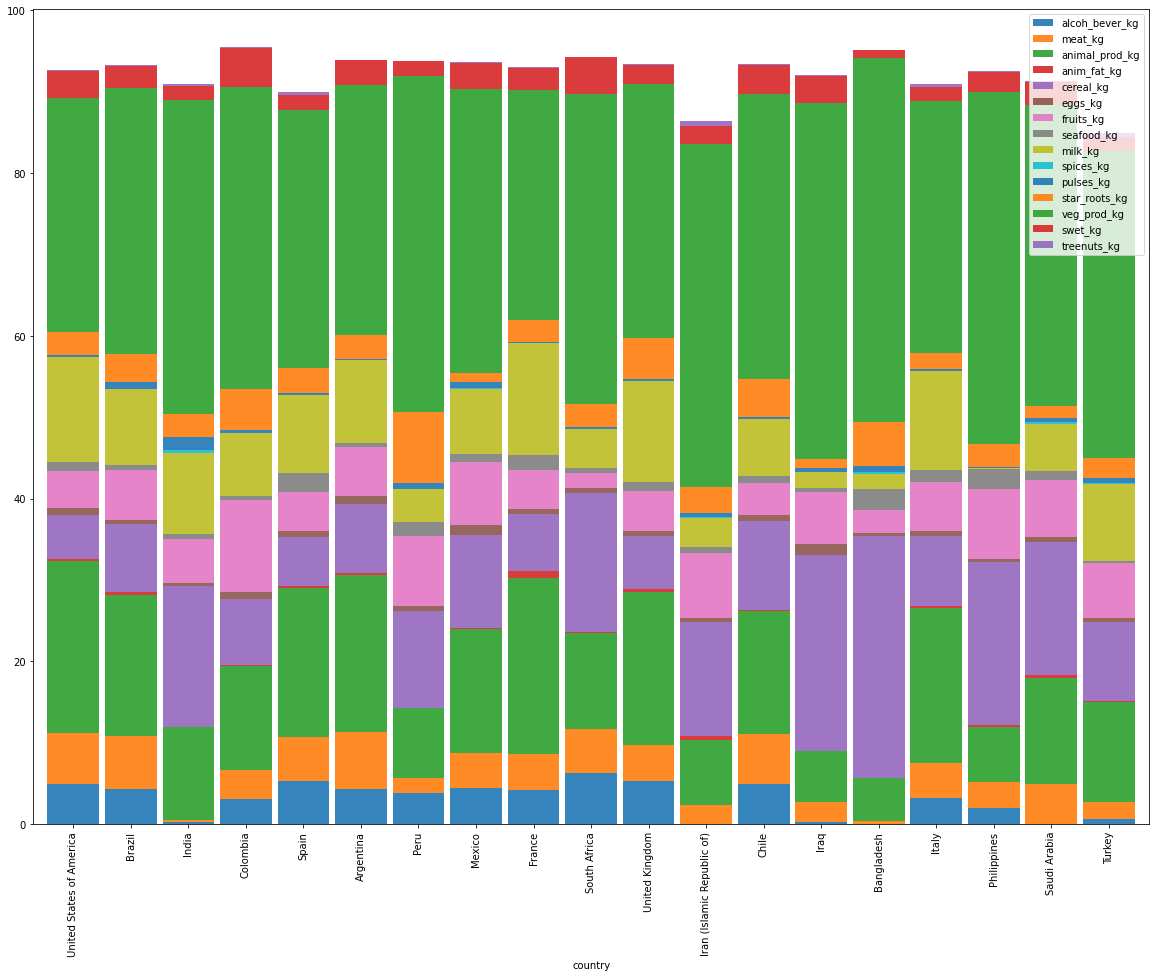

In [ ]:
contagios_2c.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_conf2.png'), plt.legend(loc='best');

Comparativo entre los dos grupos de países a traves del promedio de ingesta por tipo de alimento

In [ ]:
Promedios_c1 = contagios_1['alcoh_kg'].mean(), contagios_1['meat_kg1'].mean(), contagios_1['animal_prod_kg1'].mean(), contagios_1['anim_fat_kg1'].mean(), contagios_1['cereal_kg1'].mean(), contagios_1['eggs_kg1'].mean(), contagios_1['fruits_kg1'].mean(), contagios_1['seafood_kg1'].mean(), contagios_1['milk_kg1'].mean(), contagios_1['spices_kg1'].mean(), contagios_1['pulses_kg1'].mean(), contagios_1['roots_kg1'].mean(), contagios_1['veg_kg1'].mean(), contagios_1['swet_kg1'].mean(), contagios_1['treenuts_kg1'].mean() 

In [ ]:
Promedios_c1

(2526.415,
 4236.214999999999,
 10054.655,
 118.72000000000006,
 12785.280000000002,
 343.18999999999994,
 6544.550000000001,
 2137.41,
 2928.435,
 102.50000000000003,
 629.7650000000001,
 5022.789999999999,
 39942.915,
 3087.915,
 61.31500000000001)

In [ ]:
Promedios_c2 = contagios_2['alcoh_kg'].mean(), contagios_2['meat_kg1'].mean(), contagios_2['animal_prod_kg1'].mean(), contagios_2['anim_fat_kg1'].mean(), contagios_2['cereal_kg1'].mean(), contagios_2['eggs_kg1'].mean(), contagios_2['fruits_kg1'].mean(), contagios_2['seafood_kg1'].mean(), contagios_2['milk_kg1'].mean(), contagios_2['spices_kg1'].mean(), contagios_2['pulses_kg1'].mean(), contagios_2['roots_kg1'].mean(), contagios_2['veg_kg1'].mean(), contagios_2['swet_kg1'].mean(), contagios_2['treenuts_kg1'].mean()

In [ ]:
Promedios_c2

(3039.45,
 3985.3399999999992,
 13916.109999999997,
 223.29500000000002,
 12472.155,
 679.5600000000002,
 5955.04,
 1142.475,
 7701.379999999999,
 77.05,
 438.71000000000004,
 3514.525,
 36081.92,
 2765.035,
 177.48000000000002)

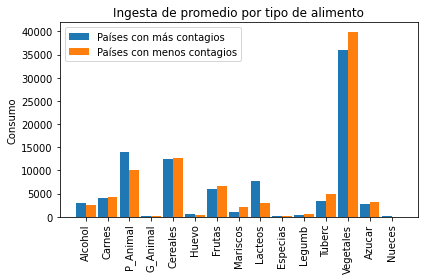

In [ ]:

Alimento_Tipo = ['Alcohol','Carnes','P_Animal', 'G_Animal', 'Cereales', 'Huevo', 'Frutas', 'Mariscos', 'Lacteos', 'Especias', 'Legumb', 'Tuberc', 'Vegetales', 'Azucar', 'Nueces']
c2_mean = [3039, 3985, 13916, 223, 12472, 679, 5955, 1142, 7701, 77, 438, 3514, 36081, 2765, 177]
c1_mean = [2526, 4236, 10054, 119, 12785, 343, 6544, 2137, 2928, 102, 630, 5023, 39943, 3088, 61]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Alimento_Tipo))

#tamaño de cada barra
width = 0.45
figsize=(30,20)
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, c2_mean, width, label='Países con más contagios')
rects2 = ax.bar(x + width/2, c1_mean, width, label='Países con menos contagios')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Consumo')
ax.set_title('Ingesta de promedio por tipo de alimento')

ax.set_xticks(x)
ax.set_xticklabels((Alimento_Tipo), rotation='vertical')

  
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()


fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()


plt.show()

La ingesta promedio de productos animales, lácteos y alcohol es mayor en países con mayor contagios, mientras que la ingesta de vegetales destaca en los países con menos contagios 

#### **MUERTES**

### Países con menos muertes

In [ ]:
dieta_4['deaths'].min()

0.0

In [ ]:
dieta_4['deaths'].max()

220011.0

In [ ]:
dieta_4[dieta_4['deaths'] == 0.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Cambodia,4578.3,1224.7,6080.0,37.7,24890.6,131.0,2318.4,4236.9,328.5,78.4,490.3,3051.9,43919.5,2992.3,23.8,54239500.0,2.541508e+08,430600.0,4.015515e+06,283.0,0.0,278.0,15497000.0,Lower-Middle-Income
Cote d'Ivoire,1448.7,958.6,2914.4,13.2,11458.5,158.7,4874.1,1391.4,128.5,124.7,172.7,23308.0,47080.6,785.9,544.3,235575000.0,4.973250e+08,0.0,7.148284e+06,0.0,0.0,0.0,26175000.0,Lower-Middle-Income
Dominica,941.0,2782.0,8901.1,31.9,3401.4,124.4,19302.8,1418.8,4421.7,151.2,225.5,6847.7,41098.9,3173.8,3.5,2030400.0,4.464000e+05,6300.0,6.998929e+06,32.0,0.0,24.0,72000.0,Upper- Middle- Income
Grenada,3131.5,5654.6,12131.9,127.6,7656.9,922.6,11060.8,2580.2,2718.3,317.1,641.7,2222.2,37864.8,5448.0,14.3,2282600.0,0.000000e+00,6800.0,3.027326e+04,24.0,0.0,24.0,113000.0,Upper- Middle- Income
Kiribati,297.0,2385.6,8895.8,48.6,8274.7,164.0,5890.7,6106.5,156.1,6.4,3.2,7183.0,41104.2,4137.3,195.1,5700000.0,3.375000e+05,14000.0,7.723089e+06,0.0,0.0,0.0,125000.0,Lower-Middle-Income
"Korea, North",898.1,1387.2,3393.3,1.0,17937.8,466.8,6138.3,1156.8,314.6,0.0,1100.0,6243.8,46604.6,369.4,42.6,183030900.0,1.232236e+09,3689400.0,0.000000e+00,0.0,0.0,0.0,25779000.0,Low-Income
Lao People's Democratic Republic,788.3,1711.1,3657.9,97.9,16394.3,106.3,8815.8,1421.3,163.2,131.7,148.5,3483.5,46341.6,1110.1,2.8,32589000.0,1.194930e+08,191600.0,6.275668e+05,23.0,0.0,22.0,7242000.0,Lower-Middle-Income
Mongolia,3143.0,8092.9,25890.4,384.6,10141.5,372.7,1041.3,44.0,15856.0,3.7,36.6,2615.5,24104.6,1468.0,13.7,65875600.0,4.503740e+07,99300.0,5.272148e+04,318.0,0.0,310.0,3361000.0,Lower-Middle-Income
New Caledonia,5036.3,5868.7,11781.8,82.1,8584.0,749.4,5585.5,2036.1,2767.5,48.8,127.5,2564.8,38220.8,3190.1,37.6,0.0,2.094500e+06,46600.0,0.000000e+00,27.0,0.0,27.0,295000.0,High-Income


Guardar la lista de países sin regsitro de muertes

In [ ]:
paises_sin_reg2 = dieta_4[dieta_4['deaths'] == 0.0 ]

In [ ]:
paises_sin_reg2.to_csv('países_sin_registro2.csv')

Eliminar las filas de los paises que no cuentan con regsitros de muertes

In [ ]:
dieta_4_death =  dieta_4.drop(["Cambodia", "Cote d'Ivoire", "Dominica", "Grenada", "Kiribati", "Korea, North", "Lao People's Democratic Republic", "Mongolia", "New Caledonia", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "Solomon Islands", "Timor-Leste", "Turkmenistan", "United Arab Emirates", "United Republic of Tanzania","Vanuatu"],axis=0)

In [ ]:
dieta_4_death['deaths'].min()

2.0

In [ ]:
dieta_4_death[dieta_4_death['deaths'] == 2.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3315200.0,87000.0,58608538.91,32.0,2.0,28.0,896000.0,Upper- Middle- Income


In [ ]:
dieta_4_death[dieta_4_death['deaths'] >= 2.0].sort_values('deaths',ascending=True).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3315200.0,87000.0,5.860854e+07,32.0,2.0,28.0,896000.0,Upper- Middle- Income
Antigua and Barbuda,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3,1871800.0,0.0,9300.0,2.290999e+04,111.0,3.0,97.0,98000.0,High-Income
Taiwan*,2766.3,6055.8,12131.2,157.7,10080.8,1090.0,8390.4,2318.2,2329.9,102.3,207.7,856.5,37868.4,2345.5,418.5,0.0,82635000.0,1228800.0,3.903935e+06,529.0,7.0,489.0,23610000.0,High-Income
Barbados,3565.0,5847.7,12497.6,221.2,8066.6,779.2,5872.3,3275.0,2204.1,156.5,639.1,4081.2,37516.7,4334.4,85.2,7117600.0,1119300.0,36400.0,6.980956e+04,208.0,7.0,186.0,287000.0,High-Income
Mauritius,3080.5,4699.2,9270.0,7.4,17185.5,591.0,3568.0,2130.3,1716.6,184.7,856.0,1834.8,40717.5,3568.0,36.9,14547500.0,8222500.0,234900.0,8.823587e+05,404.0,10.0,359.0,1265000.0,High-Income
Iceland,4754.5,4626.9,23970.0,946.1,4119.6,555.7,4840.5,4611.7,13002.8,67.6,37.6,1990.9,26033.1,3947.2,75.2,8500800.0,736000.0,18200.0,5.482724e+05,3582.0,10.0,2550.0,368000.0,High-Income
French Polynesia,4699.7,7079.8,14358.5,30.9,7647.9,538.6,4351.2,3480.9,2936.4,11.1,145.2,3543.6,35655.9,2871.5,40.5,0.0,1176000.0,39400.0,1.312261e+06,3251.0,11.0,2138.0,280000.0,High-Income
Sri Lanka,681.0,884.5,5532.8,14.7,20783.9,417.8,4117.1,3017.3,1094.8,524.4,960.8,1979.3,44461.8,2720.9,135.0,118459800.0,197433000.0,1232800.0,4.897325e+06,4844.0,13.0,3317.0,21937000.0,Lower-Middle-Income
Sao Tome and Principe,1518.7,1205.4,4119.9,22.0,7379.6,56.2,18273.6,2303.3,515.2,29.3,310.9,3715.4,45880.1,2593.9,2.4,2226000.0,1470000.0,1900.0,5.407652e+04,929.0,15.0,895.0,210000.0,Lower-Middle-Income


In [ ]:
muertes_1 = dieta_4_death[dieta_4_death['deaths'] >= 2.0].sort_values('deaths',ascending=True).head(20)

In [ ]:
muertes_1a = muertes_1[['deaths']]

In [ ]:
muertes_1a

,deaths
country,
Fiji,2.0
Antigua and Barbuda,3.0
Taiwan*,7.0
Barbados,7.0
Mauritius,10.0
Iceland,10.0
French Polynesia,11.0
Sri Lanka,13.0
Sao Tome and Principe,15.0


In [ ]:
muertes_1a.to_csv('menos_muertes.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51afb9550>, None)

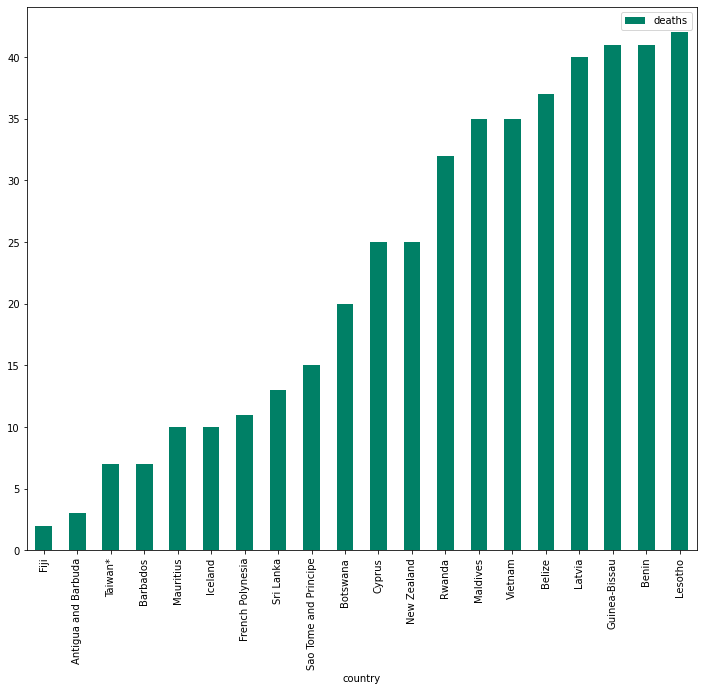

In [ ]:
muertes_1a.plot(kind = 'bar', stacked=False, colormap='summer', figsize=(12, 10)), plt.savefig('menos_muertes.png')

In [ ]:
muertes_1b = dieta_corta.reindex(index=['Fiji', 'Antigua and Barbuda', 'Taiwan*', 'Barbados', 'Mauritius', 'Iceland', 'French Polynesi', 'Sri Lanka', 'Sao Tome and Principe', 'Botswana', 'Cyprus', 'New Zealand', 'Rwanda', 'Maldives', 'Vietnam', 'Belize', 'Latvia', 'Guinea-Bissau', 'Benin','Lesotho'], columns=['alcoh_bever_kg', 'meat_kg', 'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

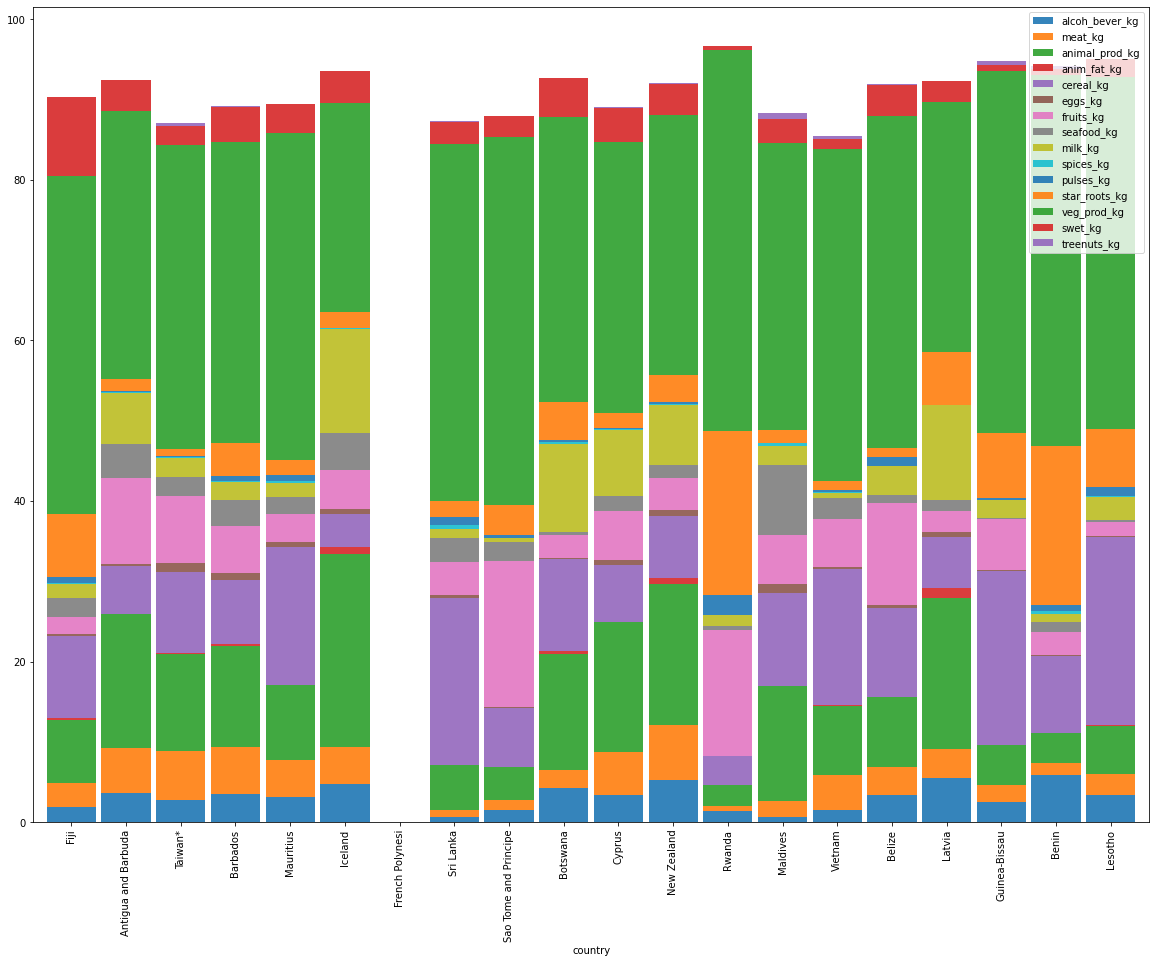

In [ ]:
muertes_1b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_muert1.png'), plt.legend(loc='best');
                 

### Países con más muertes 

In [ ]:
dieta_4['deaths'].max()

220011.0

In [ ]:
dieta_4[dieta_4['deaths'] == 220011.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,659756000.0,30987900.0,42641954.44,8037747.0,220011.0,5184564.0,329878000.0,High-Income


In [ ]:
dieta_4[dieta_4['deaths'] <= 220011.0 ].sort_values('deaths',ascending=False).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,6.597560e+08,30987900.0,4.264195e+07,8037747.0,220011.0,5184564.0,3.298780e+08,High-Income
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,4.236240e+08,16780800.0,4.940560e+07,5103408.0,150709.0,4495269.0,2.118120e+08,Upper- Middle- Income
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,77005600.0,1.622156e+05,7173345.0,109894.0,6224621.0,1.400100e+09,Lower-Middle-Income
Mexico,4410.5,4356.1,15152.7,167.2,11432.5,1296.7,7679.4,965.6,7991.7,112.1,707.1,1164.4,34845.6,3226.6,112.1,3.629293e+09,4.600512e+08,12805200.0,3.806125e+06,817503.0,83781.0,594180.0,1.277920e+08,Upper- Middle- Income
United Kingdom,5263.2,4418.1,18879.8,275.4,6541.2,621.0,4955.1,1091.1,12368.4,65.3,203.5,5113.3,31111.6,2438.3,90.1,1.981220e+09,1.343200e+08,2680500.0,1.018252e+07,617688.0,42875.0,0.0,6.716000e+07,High-Income
Italy,3189.2,4296.3,19032.9,283.4,8541.7,624.7,6020.7,1581.6,12125.8,6.4,278.1,1904.3,30967.1,1717.5,423.0,1.380778e+09,1.205920e+08,3669400.0,1.104829e+05,359569.0,36205.0,240600.0,6.029600e+07,High-Income
Peru,3862.3,1754.0,8663.8,31.6,11814.0,643.1,8578.3,1799.3,4072.9,17.2,636.7,8792.4,41334.4,1733.9,23.0,6.269384e+08,3.183928e+08,1385000.0,8.254914e+05,849371.0,33305.0,743969.0,3.282400e+07,Upper- Middle- Income
Spain,5315.2,5345.6,18338.2,235.7,6054.8,732.1,4833.2,2264.6,9599.1,6.9,266.6,3097.5,31658.1,1848.2,428.7,1.290908e+09,9.527000e+07,3619100.0,9.101101e+06,918223.0,33124.0,150000.0,4.763500e+07,High-Income
France,4163.1,4400.5,21709.7,790.7,6995.1,611.0,4878.0,1821.4,13784.0,16.4,99.1,2696.3,28290.3,2611.0,209.3,1.506608e+09,1.298800e+08,3480000.0,8.759883e+06,743479.0,32779.0,100828.0,6.494000e+07,High-Income


In [ ]:
muertes_2 = dieta_4[dieta_4['deaths'] <= 220011.0].sort_values('deaths',ascending=False).head(20)

In [ ]:
muertes_2a = muertes_2[['deaths']]

In [ ]:
muertes_2a

,deaths
country,
United States of America,220011.0
Brazil,150709.0
India,109894.0
Mexico,83781.0
United Kingdom,42875.0
Italy,36205.0
Peru,33305.0
Spain,33124.0
France,32779.0


In [ ]:
muertes_2a.to_csv('mas_muertes.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51b2c8f28>, None)

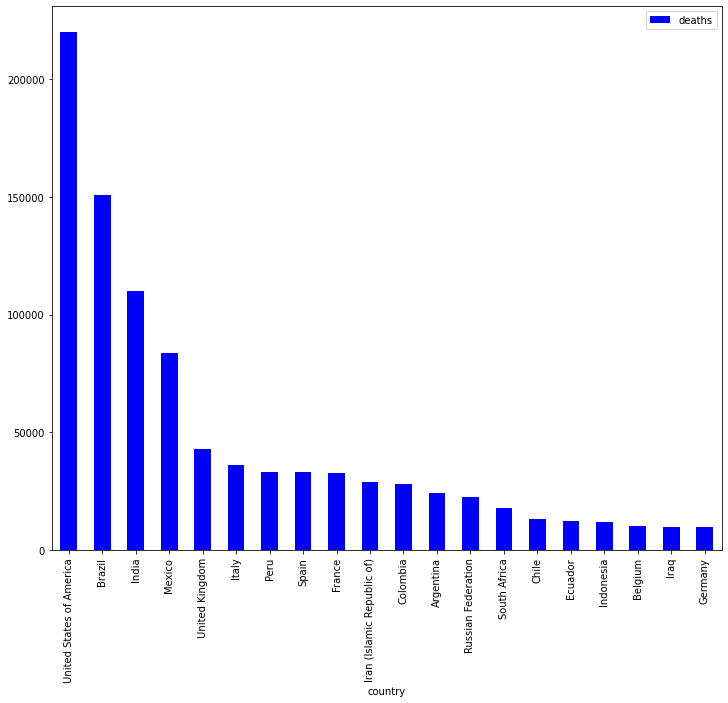

In [ ]:

muertes_2a.plot(kind = 'bar', stacked=False, colormap='winter', figsize=(12, 10)), plt.savefig('mas_muertes.png')

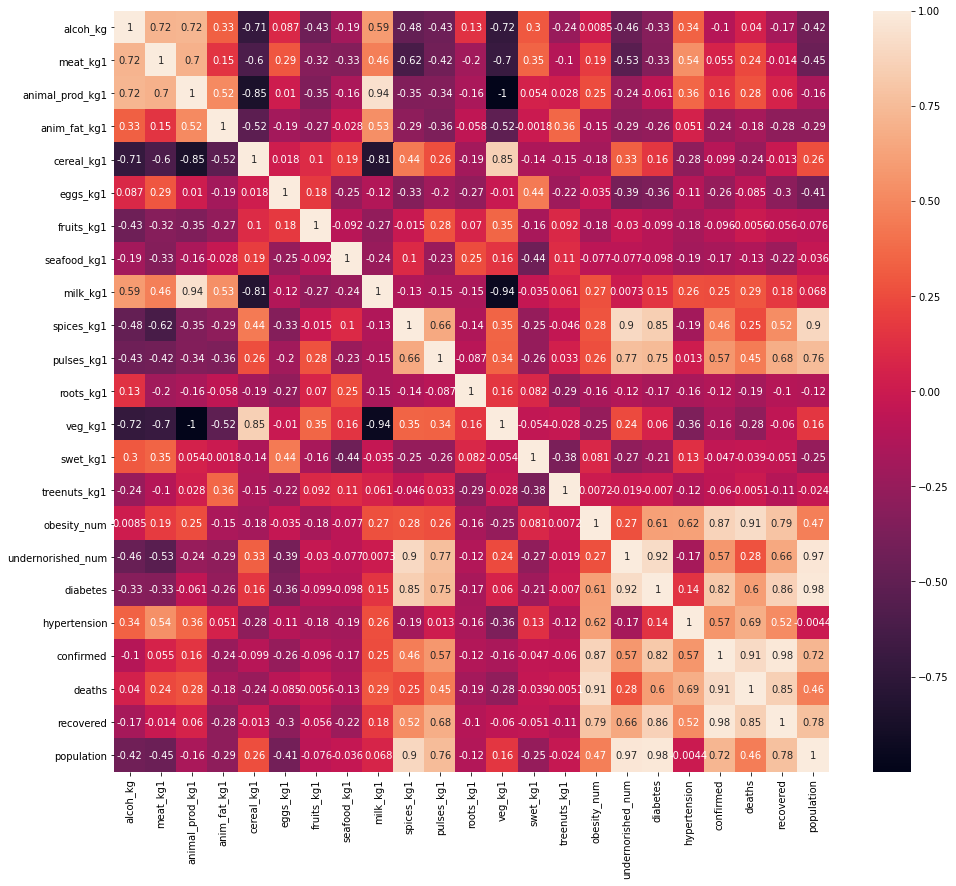

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(muertes_2.corr(), annot=True);plt.savefig('correl_muertes.png')


Dentro del grupo de los 20 paises con mayor número de muertes por Covid-19 existe una correlacion (0.91)con el grado de obesidad que cuentan esos países y en un 69% la hipertensión


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


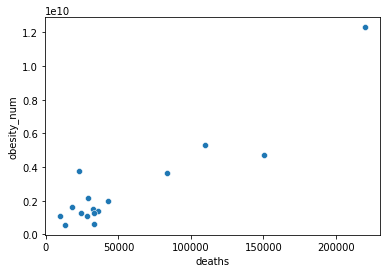

In [ ]:
sns.scatterplot(muertes_2['deaths'], contagios_2['obesity_num']); plt.savefig('corr_muert_obesity.png')

Se requiere conocer la correlacion que existe entre obesidad y la ongesta por tipo de alimento

In [ ]:
muertes_2b = dieta_corta.reindex(index=["United States of America", "Brazil", "India", "Mexico", "United Kingdom", "Italy", "Peru", "Spain", "France", "Iran (Islamic Republic of)", "Colombia", "Argentina", "Russian Federation", "South Africa", "Chile", "Ecuador", "Indonesia", "Belgium", "Iraq", "Germany"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg', 'obesity', 'undernorished', 'diabetes', 'hypertension'])

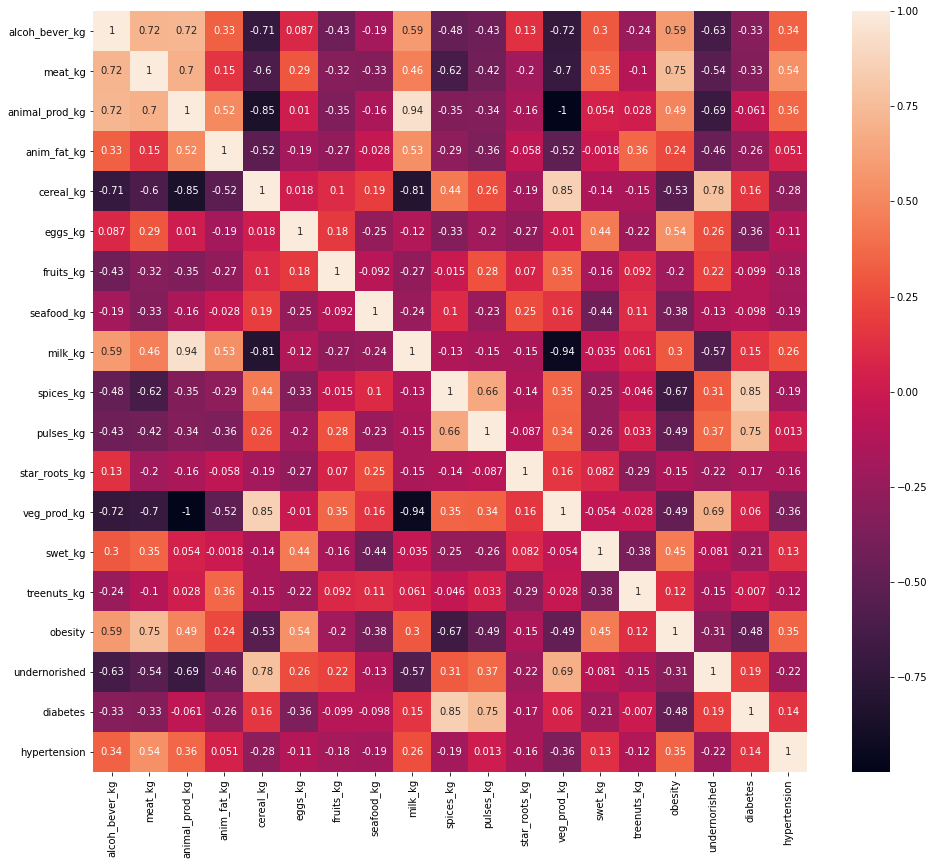

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(muertes_2b.corr(), annot=True); plt.savefig('correl_muertes_obesidad.png')


El grado de obesidad en los paises con más muertes registradas indica tiene una correlacion con la ingesta de carne (0.74) y  alcohol (0.59). en menor proporcion se encuentran huevo y azucar; para diabetes existe correlacion con la ingesta de especias y legumbre  (85 y 72%)

In [ ]:
muertes_2c = dieta_corta.reindex(index=["United States of America", "Brazil", "India", "Mexico", "United Kingdom", "Italy", "Peru", "Spain", "France", "Iran (Islamic Republic of)", "Colombia", "Argentina", "Russian Federation", "South Africa", "Chile", "Ecuador", "Indonesia", "Belgium", "Iraq", "Germany"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

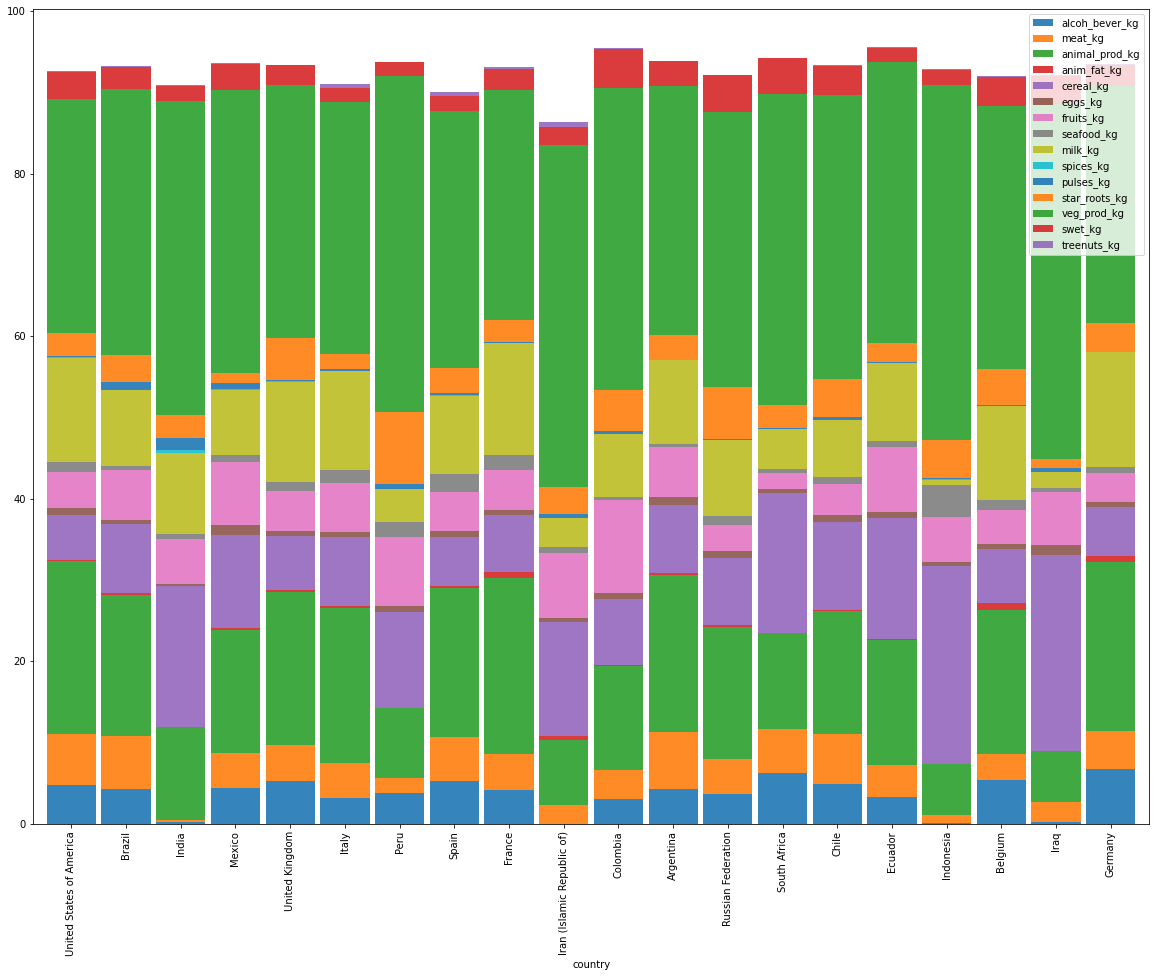

In [ ]:
muertes_2c.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_muert2.png'), plt.legend(loc='best');

Comparativos de los grupos de paises con menor y mayor número de muertes, respecto al promedio de ingesta por tipo de alimento

In [ ]:
Promedios_m1 = muertes_1['alcoh_kg'].mean(), muertes_1['meat_kg1'].mean(), muertes_1['animal_prod_kg1'].mean(), muertes_1['anim_fat_kg1'].mean(), muertes_1['cereal_kg1'].mean(), muertes_1['eggs_kg1'].mean(), muertes_1['fruits_kg1'].mean(), muertes_1['seafood_kg1'].mean(), muertes_1['milk_kg1'].mean(), muertes_1['spices_kg1'].mean(), muertes_1['pulses_kg1'].mean(), muertes_1['roots_kg1'].mean(), muertes_1['veg_kg1'].mean(), muertes_1['swet_kg1'].mean(), muertes_1['treenuts_kg1'].mean()

In [ ]:
Promedios_m1

(3178.0850000000005,
 3695.019999999999,
 11117.715,
 217.07000000000002,
 11088.140000000001,
 438.7249999999999,
 6470.1799999999985,
 2373.5799999999995,
 4216.335,
 134.27,
 545.24,
 5154.16,
 38879.869999999995,
 3195.2650000000003,
 160.57)

In [ ]:
Promedios_m2 = muertes_2['alcoh_kg'].mean(), muertes_2['meat_kg1'].mean(), muertes_2['animal_prod_kg1'].mean(), muertes_2['anim_fat_kg1'].mean(), muertes_2['cereal_kg1'].mean(), muertes_2['eggs_kg1'].mean(), muertes_2['fruits_kg1'].mean(), muertes_2['seafood_kg1'].mean(), muertes_2['milk_kg1'].mean(), muertes_2['spices_kg1'].mean(), muertes_2['pulses_kg1'].mean(), muertes_2['roots_kg1'].mean(), muertes_2['veg_kg1'].mean(), muertes_2['swet_kg1'].mean(), muertes_2['treenuts_kg1'].mean()

In [ ]:
Promedios_m2

(3684.1799999999994,
 4098.610000000001,
 15064.39,
 264.565,
 11278.204999999998,
 718.5800000000002,
 5757.155,
 1150.895,
 8640.285,
 53.565,
 360.46000000000004,
 3650.8900000000003,
 34933.060000000005,
 2859.04,
 154.30500000000004)

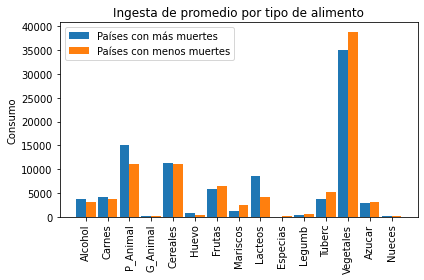

In [ ]:
Alimento_Tipo = ['Alcohol','Carnes','P_Animal', 'G_Animal', 'Cereales', 'Huevo', 'Frutas', 'Mariscos', 'Lacteos', 'Especias', 'Legumb', 'Tuberc', 'Vegetales', 'Azucar', 'Nueces']
m1_mean = [3178, 3695, 11118, 217, 11088, 439, 6470, 2373, 4216, 134, 545, 5154, 38879, 3195, 160]
m2_mean = [3684, 4098, 15064, 264, 11278, 718, 5757, 1150, 8640, 53, 360, 3651, 34933, 2859, 154]



#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Alimento_Tipo))

#tamaño de cada barra
width = 0.45
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, m2_mean, width, label='Países con más muertes')
rects2 = ax.bar(x + width/2, m1_mean, width, label='Países con menos muertes')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Consumo')
ax.set_title('Ingesta de promedio por tipo de alimento')

ax.set_xticks(x)
ax.set_xticklabels((Alimento_Tipo), rotation='vertical')

  
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

fig.tight_layout()
plt.savefig('comparativo_muerte.png')
#Mostramos la grafica con el metodo show()

plt.show()



Para el grupo de países con mayor número de muertes la ingesta de alcohol, carnes , productos animales, cereales y lácteos es mayor; mientras que en los países con menos muertes se destaca un mayor consumo de vegetales, tuberculos y frutas.

#### **RECUPERADOS**

### Países con el menor numero de recuperados

In [ ]:
dieta_4['recovered'].min()

0.0

In [ ]:
dieta_4[dieta_4['recovered'] == 0.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Cote d'Ivoire,1448.7,958.6,2914.4,13.2,11458.5,158.7,4874.1,1391.4,128.5,124.7,172.7,23308.0,47080.6,785.9,544.3,2.355750e+08,4.973250e+08,0.0,7.148284e+06,0.0,0.0,0.0,26175000.0,Lower-Middle-Income
Kiribati,297.0,2385.6,8895.8,48.6,8274.7,164.0,5890.7,6106.5,156.1,6.4,3.2,7183.0,41104.2,4137.3,195.1,5.700000e+06,3.375000e+05,14000.0,7.723089e+06,0.0,0.0,0.0,125000.0,Lower-Middle-Income
"Korea, North",898.1,1387.2,3393.3,1.0,17937.8,466.8,6138.3,1156.8,314.6,0.0,1100.0,6243.8,46604.6,369.4,42.6,1.830309e+08,1.232236e+09,3689400.0,0.000000e+00,0.0,0.0,0.0,25779000.0,Low-Income
Netherlands,4390.3,4010.5,24297.7,334.3,4968.5,747.0,4923.0,1151.7,18005.1,64.0,85.2,4263.9,25695.9,2344.6,158.7,4.034877e+08,3.493400e+07,1019100.0,1.020978e+06,181498.0,6596.0,0.0,17467000.0,High-Income
Saint Vincent and the Grenadines,2526.0,6918.4,11086.5,22.0,9014.2,341.2,10471.0,1378.5,2259.3,211.3,645.2,4373.4,38900.5,3459.2,35.7,2.641800e+06,6.327000e+05,8800.0,4.278208e+06,0.0,0.0,0.0,111000.0,Upper- Middle- Income
Samoa,1423.6,5799.3,11163.0,226.2,3676.8,131.4,10784.5,2778.8,1964.7,58.2,0.0,7694.4,38834.9,2081.1,10.8,9.100000e+06,5.400000e+05,7700.0,4.760302e+04,0.0,0.0,0.0,200000.0,Upper- Middle- Income
Solomon Islands,829.8,889.7,3850.4,103.8,9023.3,82.6,3279.8,2284.0,438.0,36.4,736.6,24250.0,46149.2,826.8,35.6,1.465750e+07,6.363500e+06,46900.0,1.572652e+05,2.0,0.0,0.0,715000.0,Lower-Middle-Income
Sweden,4423.2,4147.6,24062.7,1044.2,6192.3,726.6,3540.5,1765.9,16368.7,48.4,93.7,2834.3,25928.2,2521.1,99.6,2.293317e+08,2.075400e+07,521200.0,1.998463e+06,98451.0,5894.0,0.0,10377000.0,High-Income
Turkmenistan,503.8,4376.7,16061.1,337.3,14802.9,513.9,4144.1,213.7,10560.6,1.5,103.2,2300.0,33938.9,674.6,28.3,1.055425e+08,3.256740e+07,188300.0,1.528365e+06,0.0,0.0,0.0,6031000.0,Upper- Middle- Income


Se guardan los países sin registros de recuperados

In [ ]:
paises_sin_reg3 = dieta_4[dieta_4['recovered'] == 0.0 ]

Se eliminan los paises que no tienen registro

In [ ]:
dieta_4_recov =  dieta_4.drop(["Cote d'Ivoire", "Kiribati", "Korea, North", "Netherlands", "Saint Vincent and the Grenadines", "Samoa", "Solomon Islands", "Sweden", "Turkmenistan", "United Arab Emirates", "United Kingdom", "United Republic of Tanzania", "Vanuatu"],axis=0)




In [ ]:
dieta_4_recov['recovered'].min()

18.0

In [ ]:
dieta_4_recov[dieta_4_recov['recovered'] == 18 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.0,5300.0,24353901.89,19.0,0.0,18.0,54000.0,High-Income


In [ ]:
dieta_4_recov[dieta_4_recov['recovered'] >= 18].sort_values('recovered',ascending=True).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.0,5300.0,2.435390e+07,19.0,0.0,18.0,54000.0,High-Income
Lao People's Democratic Republic,788.3,1711.1,3657.9,97.9,16394.3,106.3,8815.8,1421.3,163.2,131.7,148.5,3483.5,46341.6,1110.1,2.8,32589000.0,119493000.0,191600.0,6.275668e+05,23.0,0.0,22.0,7242000.0,Lower-Middle-Income
Grenada,3131.5,5654.6,12131.9,127.6,7656.9,922.6,11060.8,2580.2,2718.3,317.1,641.7,2222.2,37864.8,5448.0,14.3,2282600.0,0.0,6800.0,3.027326e+04,24.0,0.0,24.0,113000.0,Upper- Middle- Income
Dominica,941.0,2782.0,8901.1,31.9,3401.4,124.4,19302.8,1418.8,4421.7,151.2,225.5,6847.7,41098.9,3173.8,3.5,2030400.0,446400.0,6300.0,6.998929e+06,32.0,0.0,24.0,72000.0,Upper- Middle- Income
New Caledonia,5036.3,5868.7,11781.8,82.1,8584.0,749.4,5585.5,2036.1,2767.5,48.8,127.5,2564.8,38220.8,3190.1,37.6,0.0,2094500.0,46600.0,0.000000e+00,27.0,0.0,27.0,295000.0,High-Income
Saint Lucia,7802.4,8170.0,14889.3,25.2,7209.1,332.6,5945.3,3065.2,2888.1,178.0,566.3,2642.7,35096.4,3704.3,57.5,3603600.0,0.0,14800.0,8.103070e+06,29.0,0.0,27.0,182000.0,Upper- Middle- Income
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3315200.0,87000.0,5.860854e+07,32.0,2.0,28.0,896000.0,Upper- Middle- Income
Timor-Leste,445.9,4037.6,5498.3,89.7,26332.0,102.5,2102.7,1022.5,130.7,50.0,909.8,5502.2,44503.0,2820.3,1.3,3822200.0,32818200.0,32000.0,3.625035e+05,29.0,0.0,28.0,1318000.0,Lower-Middle-Income
Antigua and Barbuda,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3,1871800.0,0.0,9300.0,2.290999e+04,111.0,3.0,97.0,98000.0,High-Income


In [ ]:
recuperados_1 = dieta_4_recov[dieta_4_recov['recovered'] >= 18].sort_values('recovered',ascending=True).head(20)


In [ ]:
recuperados_1a = recuperados_1[['recovered']]

In [ ]:
recuperados_1a

,recovered
country,
Saint Kitts and Nevis,18.0
Lao People's Democratic Republic,22.0
Grenada,24.0
Dominica,24.0
New Caledonia,27.0
Saint Lucia,27.0
Fiji,28.0
Timor-Leste,28.0
Antigua and Barbuda,97.0


In [ ]:
recuperados_1a.to_csv('menos_recuperados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51d753e80>, None)

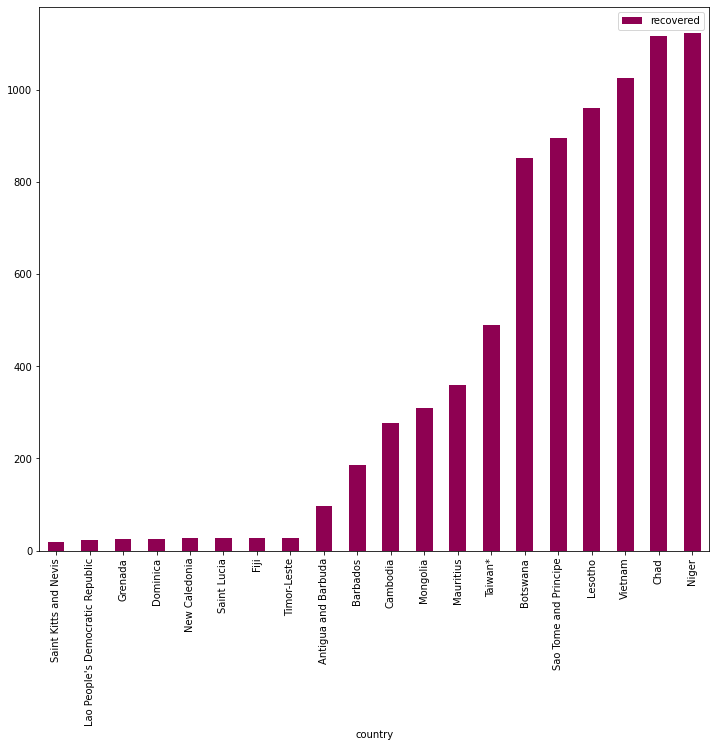

In [ ]:
recuperados_1a.plot(kind = 'bar', stacked=False, colormap= 'PiYG', figsize=(12, 10)), plt.savefig('menos_recupe.png')

In [ ]:
recuperados_1b = dieta_corta.reindex(index=["Saint Kitts and Nevis", "Lao People's Democratic Republic", "Grenada", "Dominica", "New Caledonia", "Saint Lucia", "Fiji", "Timor-Leste", "Antigua and Barbuda", "Barbados", "Cambodia", "Mongolia", "Mauritius", "Taiwan*", "Botswana", "Sao Tome and Principe", "Lesotho", "Vietnam", "Chad", "Niger" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

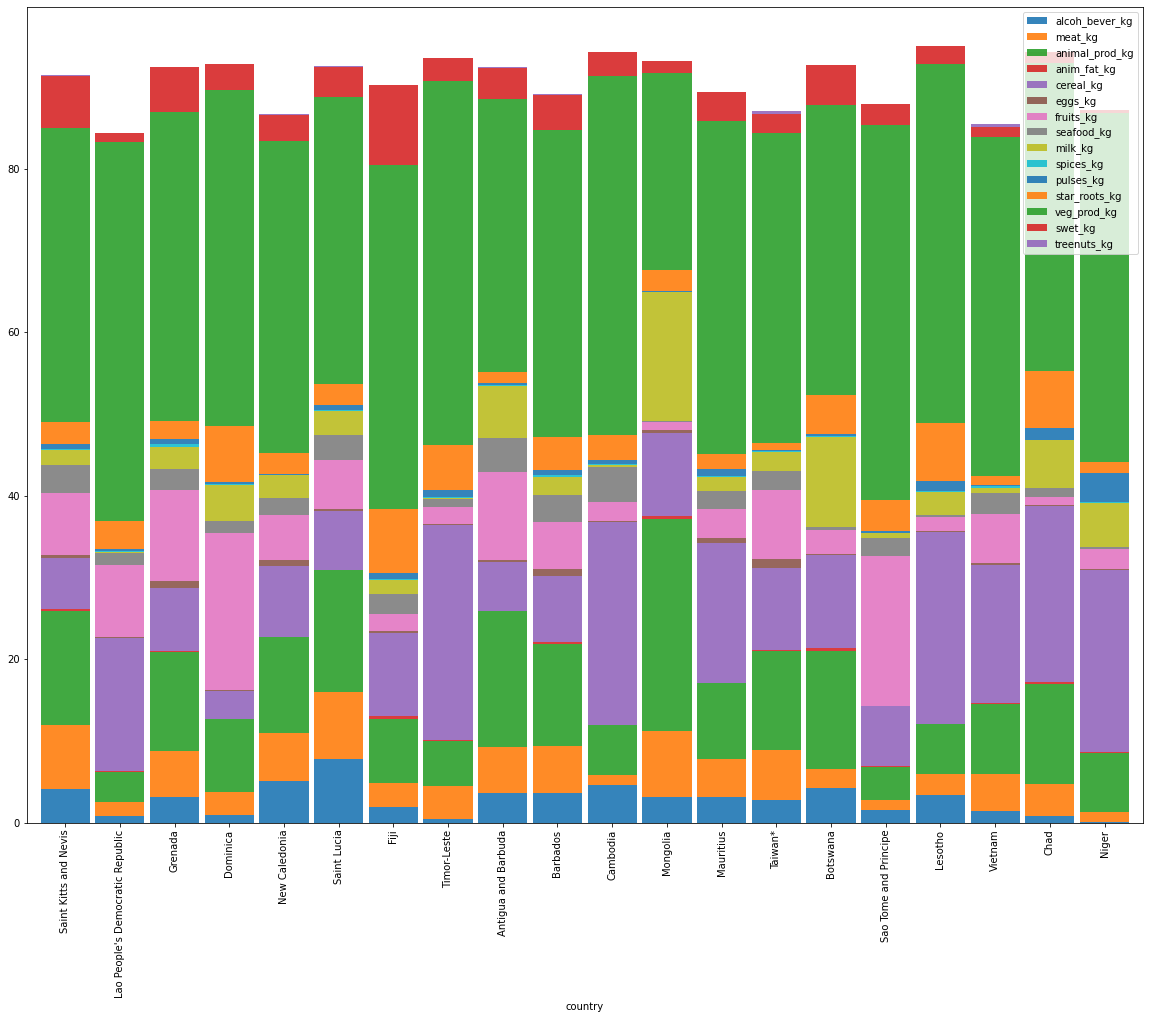

In [ ]:
recuperados_1b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_recp1.png'), plt.legend(loc='best');

### Países con más número de personas recuperadas

In [ ]:
dieta_4['recovered'].max()

6224621.0

In [ ]:
dieta_4[dieta_4['recovered'] == 6224621.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,77005600.0,162215.6214,7173345.0,109894.0,6224621.0,1.400100e+09,Lower-Middle-Income


In [ ]:
dieta_4[dieta_4['recovered'] <= 6224621.05 ].sort_values('recovered',ascending=False).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,77005600.0,1.622156e+05,7173345.0,109894.0,6224621.0,1.400100e+09,Lower-Middle-Income
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,6.597560e+08,30987900.0,4.264195e+07,8037747.0,220011.0,5184564.0,3.298780e+08,High-Income
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,4.236240e+08,16780800.0,4.940560e+07,5103408.0,150709.0,4495269.0,2.118120e+08,Upper- Middle- Income
Russian Federation,3742.5,4318.0,16152.5,248.6,8280.3,902.9,3162.0,1131.2,9325.3,11.8,142.6,6319.4,33847.2,4614.4,11.8,3.771038e+09,2.934660e+08,8288500.0,8.810724e+04,1312310.0,22722.0,1024235.0,1.467330e+08,Upper- Middle- Income
Colombia,3103.2,3554.0,12821.0,81.4,8105.5,813.2,11327.6,455.2,7744.3,34.3,350.3,5030.9,37177.4,4751.8,94.7,1.092712e+09,2.373312e+08,2836500.0,9.485934e+06,919083.0,27985.0,798396.0,4.944400e+07,Upper- Middle- Income
Peru,3862.3,1754.0,8663.8,31.6,11814.0,643.1,8578.3,1799.3,4072.9,17.2,636.7,8792.4,41334.4,1733.9,23.0,6.269384e+08,3.183928e+08,1385000.0,8.254914e+05,849371.0,33305.0,743969.0,3.282400e+07,Upper- Middle- Income
Argentina,4267.2,7042.1,19345.4,223.4,8410.2,997.9,6043.5,469.3,10232.8,12.2,52.8,3042.0,30655.9,3053.6,20.0,1.293244e+09,2.087342e+08,1837400.0,1.026123e+07,903730.0,24186.0,732582.0,4.537700e+07,Upper- Middle- Income
South Africa,6265.8,5393.3,11843.3,59.3,17103.5,594.0,1935.5,536.5,4815.5,53.9,154.6,2850.3,38155.4,4467.7,10.8,1.609956e+09,3.696936e+08,4581200.0,1.592663e+07,693359.0,17863.0,624659.0,5.962800e+07,Upper- Middle- Income
Mexico,4410.5,4356.1,15152.7,167.2,11432.5,1296.7,7679.4,965.6,7991.7,112.1,707.1,1164.4,34845.6,3226.6,112.1,3.629293e+09,4.600512e+08,12805200.0,3.806125e+06,817503.0,83781.0,594180.0,1.277920e+08,Upper- Middle- Income


In [ ]:
recuperados_2 = dieta_4[dieta_4['recovered'] <= 6224621.0 ].sort_values('recovered',ascending=False).head(20)

In [ ]:
recuperados_2a = recuperados_2[['recovered']]

In [ ]:
recuperados_2a

,recovered
country,
India,6224621.0
United States of America,5184564.0
Brazil,4495269.0
Russian Federation,1024235.0
Colombia,798396.0
Peru,743969.0
Argentina,732582.0
South Africa,624659.0
Mexico,594180.0


In [ ]:
recuperados_2a.to_csv('mas_recuperados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb51d6682b0>, None)

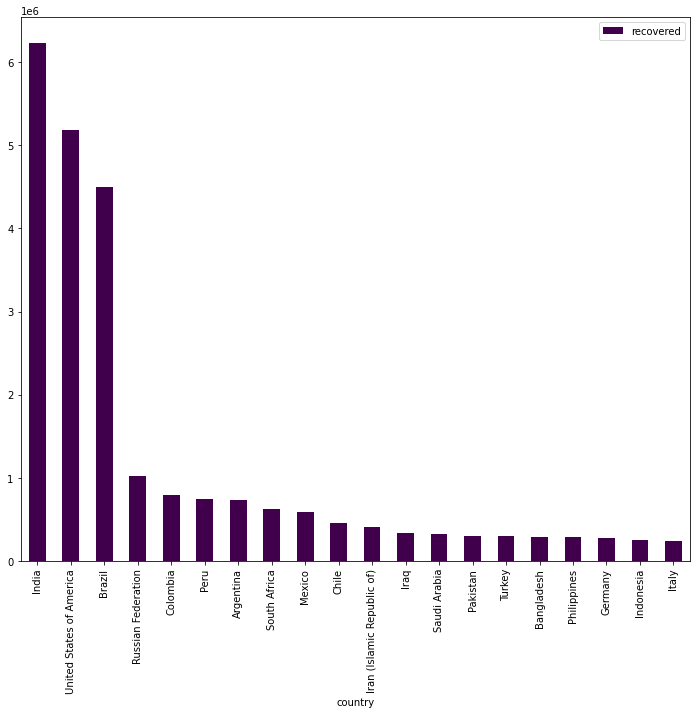

In [ ]:
recuperados_2a.plot(kind = 'bar', stacked=False, colormap= 'PRGn', figsize=(12, 10)), plt.savefig('mas_recupe.png')

In [ ]:
Recuperados_2b = dieta_corta.reindex(index=[ "India", "United States of America","Brazil", "Russian Federation", "Colombia", "Peru", "Argentina", "South Africa", "Mexico", "Chile", "Iran (Islamic Republic of)", "Iraq", "Saudi Arabia", "Pakistan", "Turkey","Bangladesh", "Philippines", "Germany", "Indonesia", "Italy"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

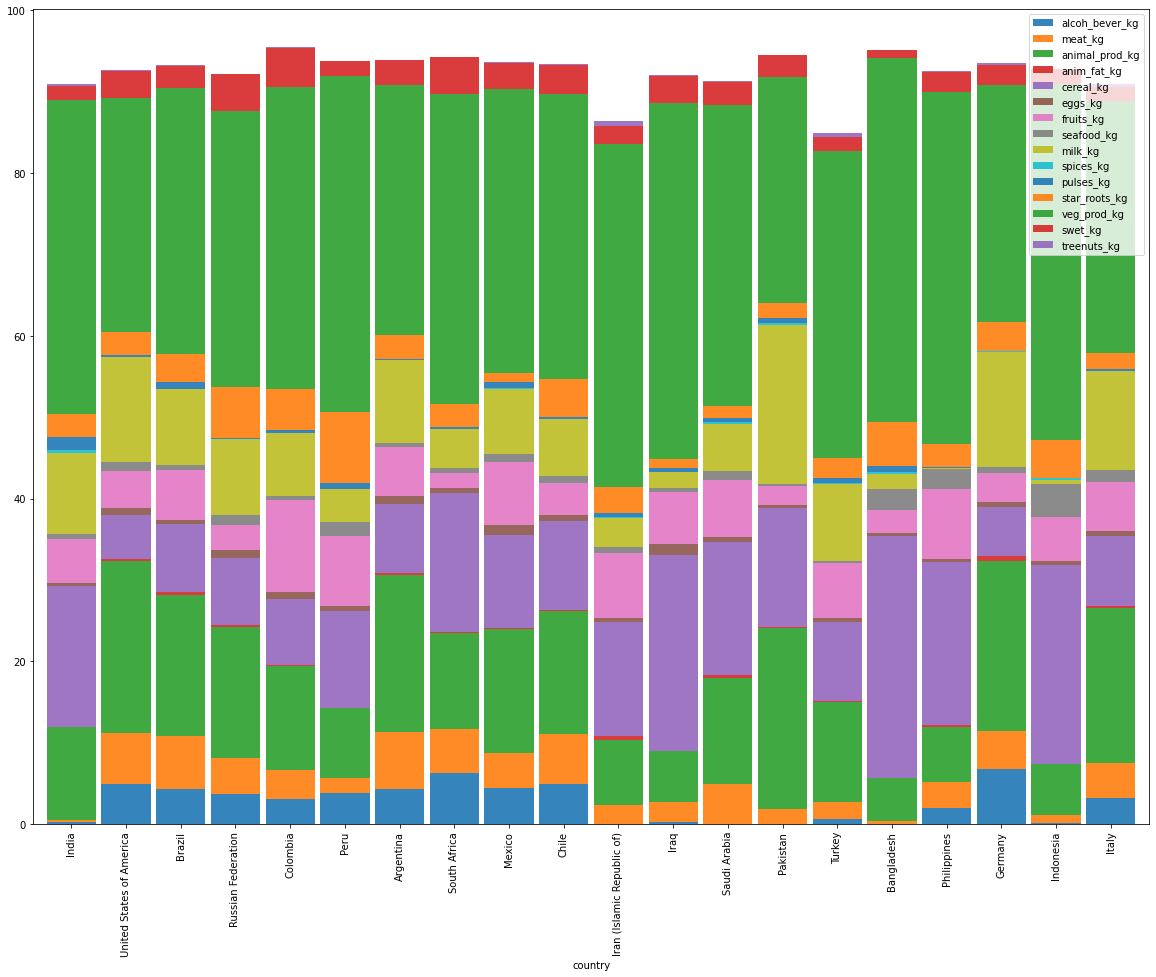

In [ ]:
Recuperados_2b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_recp2.png'), plt.legend(loc='best');

Comparativos

In [ ]:
Promedios_r1 = recuperados_1['alcoh_kg'].mean(), recuperados_1['meat_kg1'].mean(), recuperados_1['animal_prod_kg1'].mean(), recuperados_1['anim_fat_kg1'].mean(), recuperados_1['cereal_kg1'].mean(), recuperados_1['eggs_kg1'].mean(), recuperados_1['fruits_kg1'].mean(), recuperados_1['seafood_kg1'].mean(), recuperados_1['milk_kg1'].mean(), recuperados_1['spices_kg1'].mean(), recuperados_1['pulses_kg1'].mean(), recuperados_1['roots_kg1'].mean(), recuperados_1['veg_kg1'].mean(), recuperados_1['swet_kg1'].mean(), recuperados_1['treenuts_kg1'].mean()

In [ ]:
Promedios_r1

(2817.495,
 4311.7649999999985,
 10701.12,
 130.38500000000005,
 13271.615000000002,
 344.0999999999999,
 6345.179999999999,
 2014.06,
 3589.3599999999997,
 114.56999999999998,
 659.71,
 3639.995,
 39295.935,
 3340.0750000000007,
 56.65)

In [ ]:
Promedios_r2 = recuperados_2['alcoh_kg'].mean(), recuperados_2['meat_kg1'].mean(), recuperados_2['animal_prod_kg1'].mean(), recuperados_2['anim_fat_kg1'].mean(), recuperados_2['cereal_kg1'].mean(), recuperados_2['eggs_kg1'].mean(), recuperados_2['fruits_kg1'].mean(), recuperados_2['seafood_kg1'].mean(), recuperados_2['milk_kg1'].mean(), recuperados_2['spices_kg1'].mean(), recuperados_2['pulses_kg1'].mean(), recuperados_2['roots_kg1'].mean(), recuperados_2['veg_kg1'].mean(), recuperados_2['swet_kg1'].mean(), recuperados_2['treenuts_kg1'].mean()

In [ ]:
Promedios_r2

(2645.3399999999997,
 3651.1150000000002,
 13438.814999999999,
 198.17000000000002,
 13745.125,
 653.5300000000001,
 5798.545,
 1123.495,
 7634.795,
 90.395,
 452.2499999999999,
 3470.4549999999995,
 36559.455,
 2771.45,
 157.67000000000002)

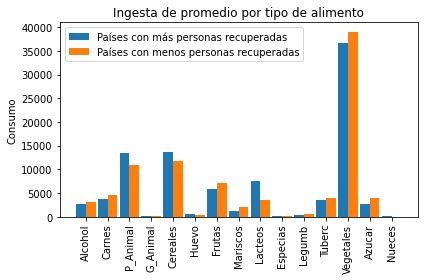

In [ ]:
Alimento_Tipo = ['Alcohol','Carnes','P_Animal', 'G_Animal', 'Cereales', 'Huevo', 'Frutas', 'Mariscos', 'Lacteos', 'Especias', 'Legumb', 'Tuberc', 'Vegetales', 'Azucar', 'Nueces']
r1_mean = [3119, 4671, 10943, 122, 11802, 374, 7083, 1989, 3544, 125, 627, 4053, 39053, 3916, 52]
r2_mean = [2645, 3651, 13439, 198, 13745, 653, 5798, 1123, 7634, 90, 452, 3470, 36559, 2771, 156]



#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Alimento_Tipo))

#tamaño de cada barra
width = 0.45
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, r2_mean, width, label='Países con más personas recuperadas')
rects2 = ax.bar(x + width/2, r1_mean, width, label='Países con menos personas recuperadas')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Consumo')
ax.set_title('Ingesta de promedio por tipo de alimento')

ax.set_xticks(x)
ax.set_xticklabels((Alimento_Tipo), rotation='vertical')

  
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

fig.tight_layout()
plt.savefig('comparativo_recuperados.png')
#Mostramos la grafica con el metodo show()

plt.show()



Los países en donde se ha presentado un mayor número de casos de personas recuperados presentan una menor ingesta promedio de alcohol, carnes y azúcares

In [ ]:
dieta_4['obesity_num'].max()

12304449400.0

In [ ]:
dieta_4[dieta_4['obesity_num'] == 12304449400.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed,deaths,recovered,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,659756000.0,30987900.0,42641954.44,8037747.0,220011.0,5184564.0,329878000.0,High-Income


In [ ]:
dieta_4['diabetes'].max()

116446900.0

In [ ]:
dieta_4[dieta_4['diabetes'] == 116446900.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
China,2322.4,6073.2,13424.0,86.6,8929.8,1205.9,4245.1,3343.5,1796.2,36.4,70.4,1901.6,36574.4,3106.5,266.5,9.255741e+09,1.192027e+10,116446900.0,268243365.5,8.969500e+06,471100.38828,8.398800e+06,1.402385e+09,Upper- Middle- Income


In [ ]:
dieta_4['hypertension'].max()

268243365.5

In [ ]:
dieta_4[dieta_4['hypertension'] == 268243365.5 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,diabetes,hypertension,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,,
China,2322.4,6073.2,13424.0,86.6,8929.8,1205.9,4245.1,3343.5,1796.2,36.4,70.4,1901.6,36574.4,3106.5,266.5,9.255741e+09,1.192027e+10,116446900.0,268243365.5,8.969500e+06,471100.38828,8.398800e+06,1.402385e+09,Upper- Middle- Income
